# Salary Predictions Based on Job Descriptions

# DEFINE

### ---- 1 Defining the problem ----

How can we use job postings to predict salaries? 

Using data from historical job postings we will train a model to predict salaries.  This will allow recruiters to make more informed decisions when making and negotiating job offers. 

In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
print('Libraries loaded')

#your info here
__author__ = "Kevin Moldovan"

Libraries loaded


## DISCOVER

### ---- 2 Loading the data ----

In [6]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('data/train_features.csv')
train_salaries = pd.read_csv('data/train_salaries.csv')
test_features= pd.read_csv('data/test_features.csv')
print('CSVs loaded')

CSVs loaded


In [ ]:
#only for goolge colab - mounting google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#only for google colab - loading data
train_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train_features.csv')
train_salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train_salaries.csv')
test_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test_features.csv')
print('CSVs loaded')

### ---- 3 Clean the data ---- 
Looking for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [7]:
train_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [8]:
test_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [9]:
train_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [11]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [14]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [16]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


#### Checking for duplicate data

In [3]:
print('train_features duplicates: ', train_features.duplicated().sum())
print('train_salaries duplicates: ', train_salaries.duplicated().sum())
print('test_features  duplicates: ', test_features.duplicated().sum())

train_features duplicates:  0
train_salaries duplicates:  0
test_features  duplicates:  0


#### Finding Corrupt Data

In [10]:
#Looking for invalid/corrupt data 
print(train_features.isnull().sum())
print(train_salaries.isnull().sum())
print(test_features.isnull().sum())

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64
jobId     0
salary    0
dtype: int64
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [7]:
#Merging Train and Target DFs
train_df = pd.merge(train_features, train_salaries, on='jobId')

In [33]:
train_df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [14]:
#Generating descriptive statistics for for train_df numeric columns
train_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [15]:
#Generating descriptive statistics for train_df categorical columns
train_df.describe(exclude = [np.number])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684984286,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


In [18]:
#Generating descriptive statistics for test_feature_df numeric columns
test_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [16]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable - did I do this?
#summarize the target variable
#look for correlation between each feature and the target

#look for correlation between features

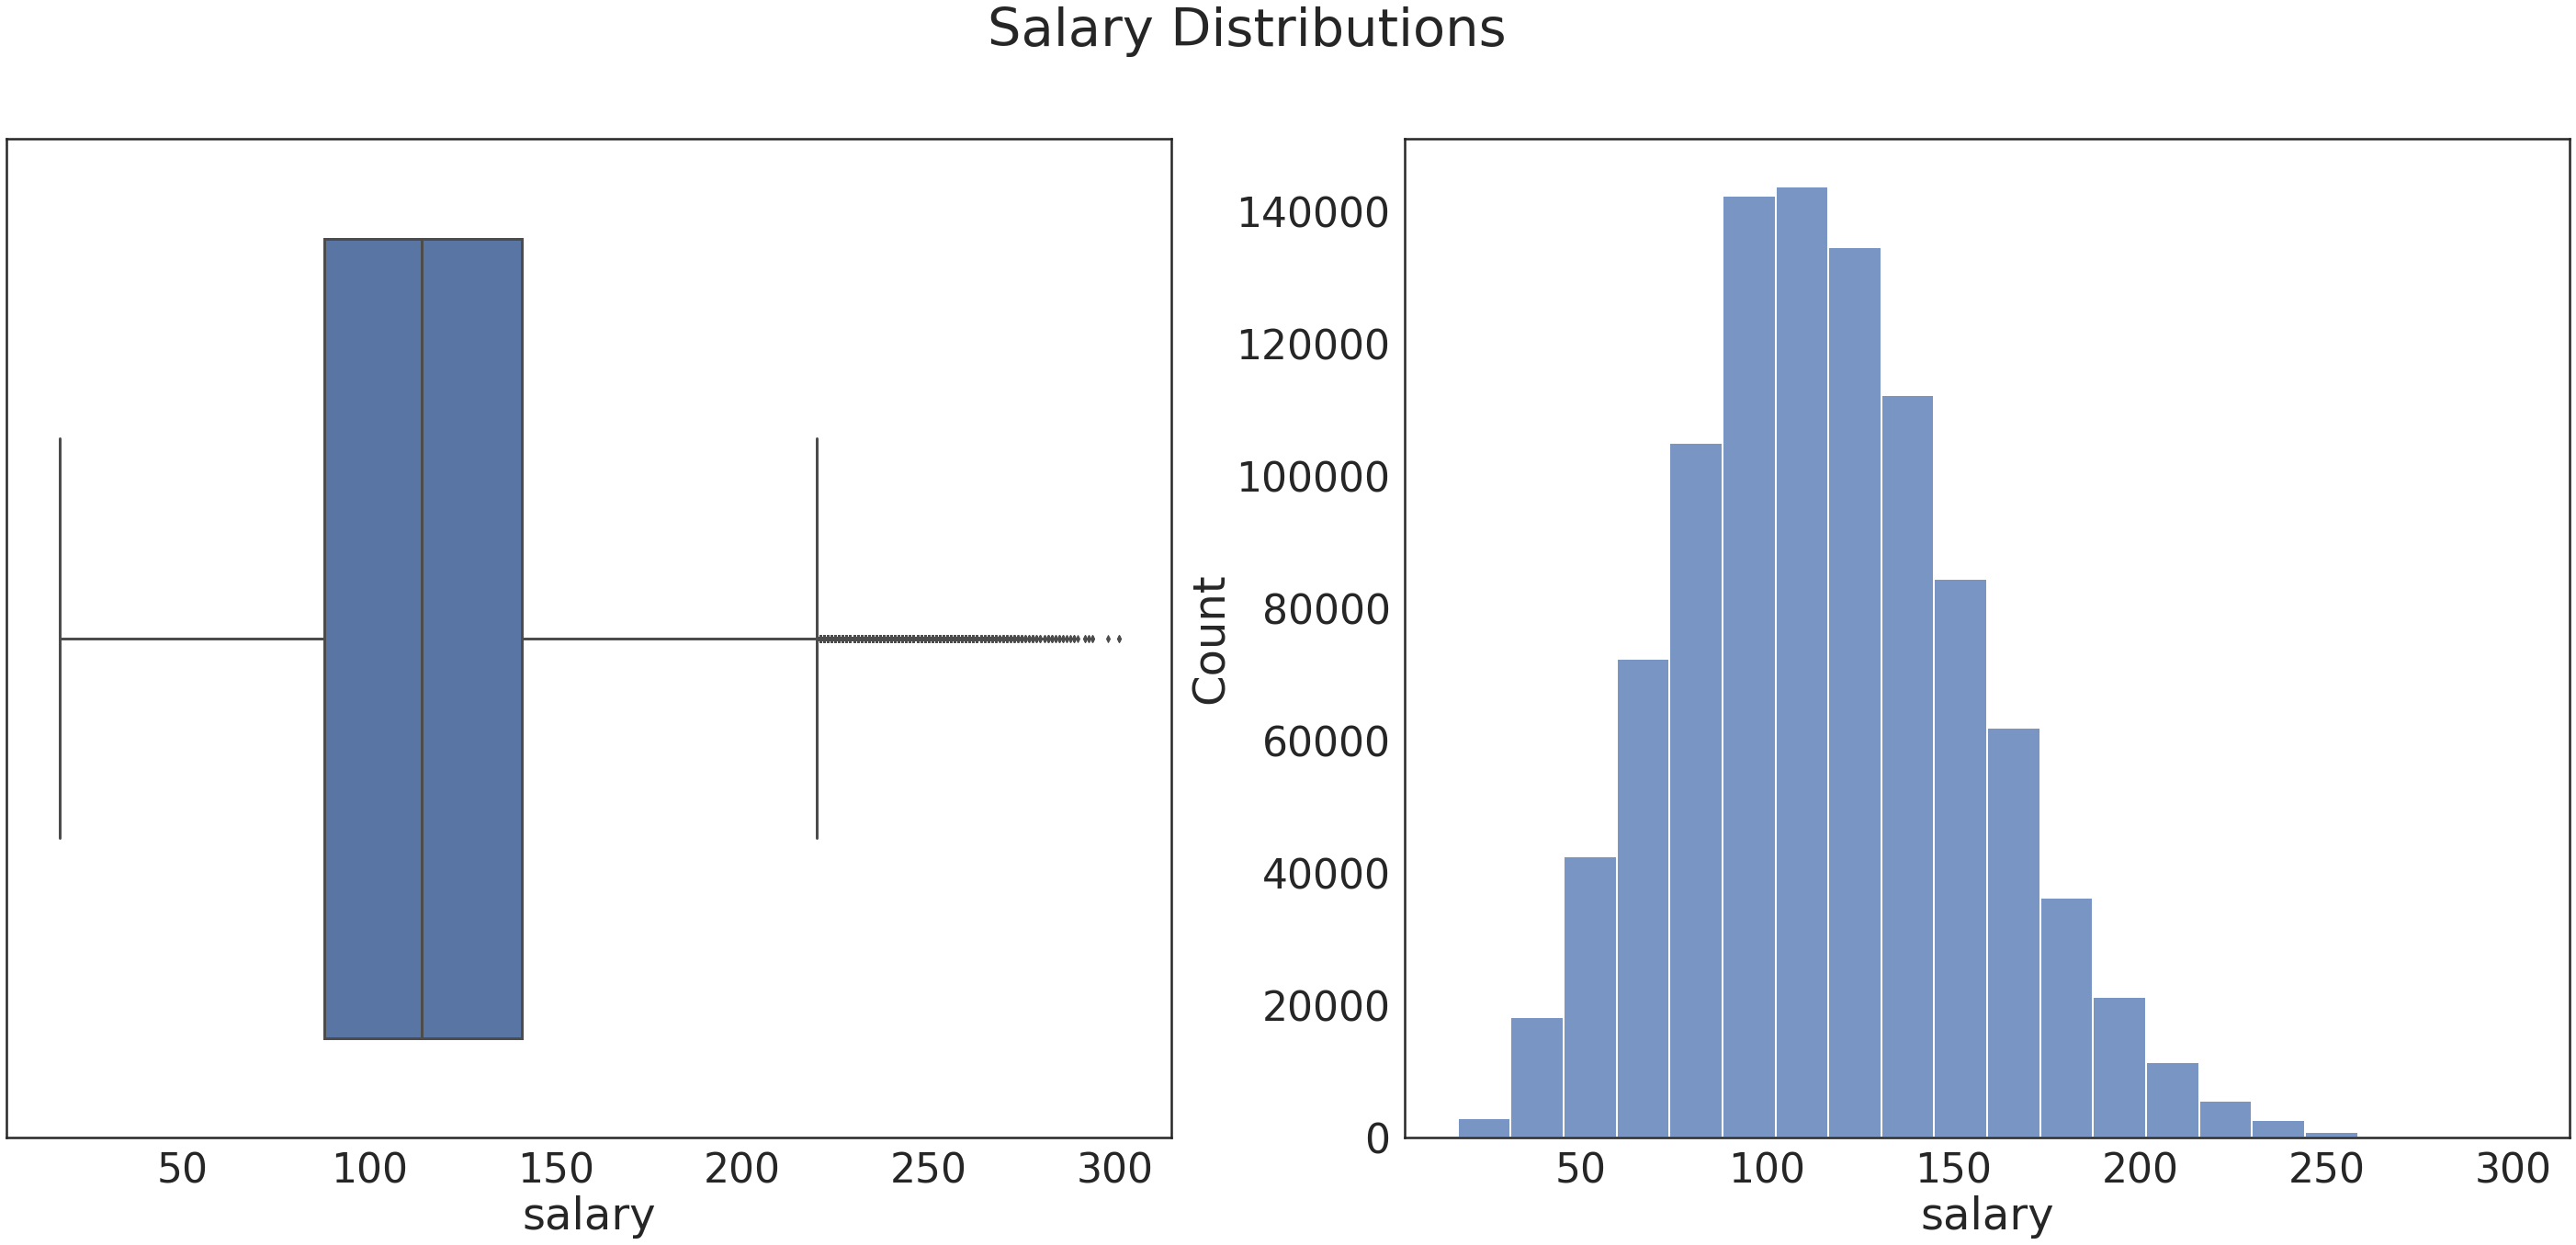

In [19]:
#visualizing salary distributions
sns.set(style='white')
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
plt.subplot(1,2,1)
sns.boxplot(x=train_df.salary) 
plt.subplot(1,2,2)
sns.histplot(x=train_df.salary, bins=20)
plt.suptitle('Salary Distributions') 
plt.show()

The mean salary appears to be close to 110,000 with a few large salaries over 200,000 skewing the distribution to the left

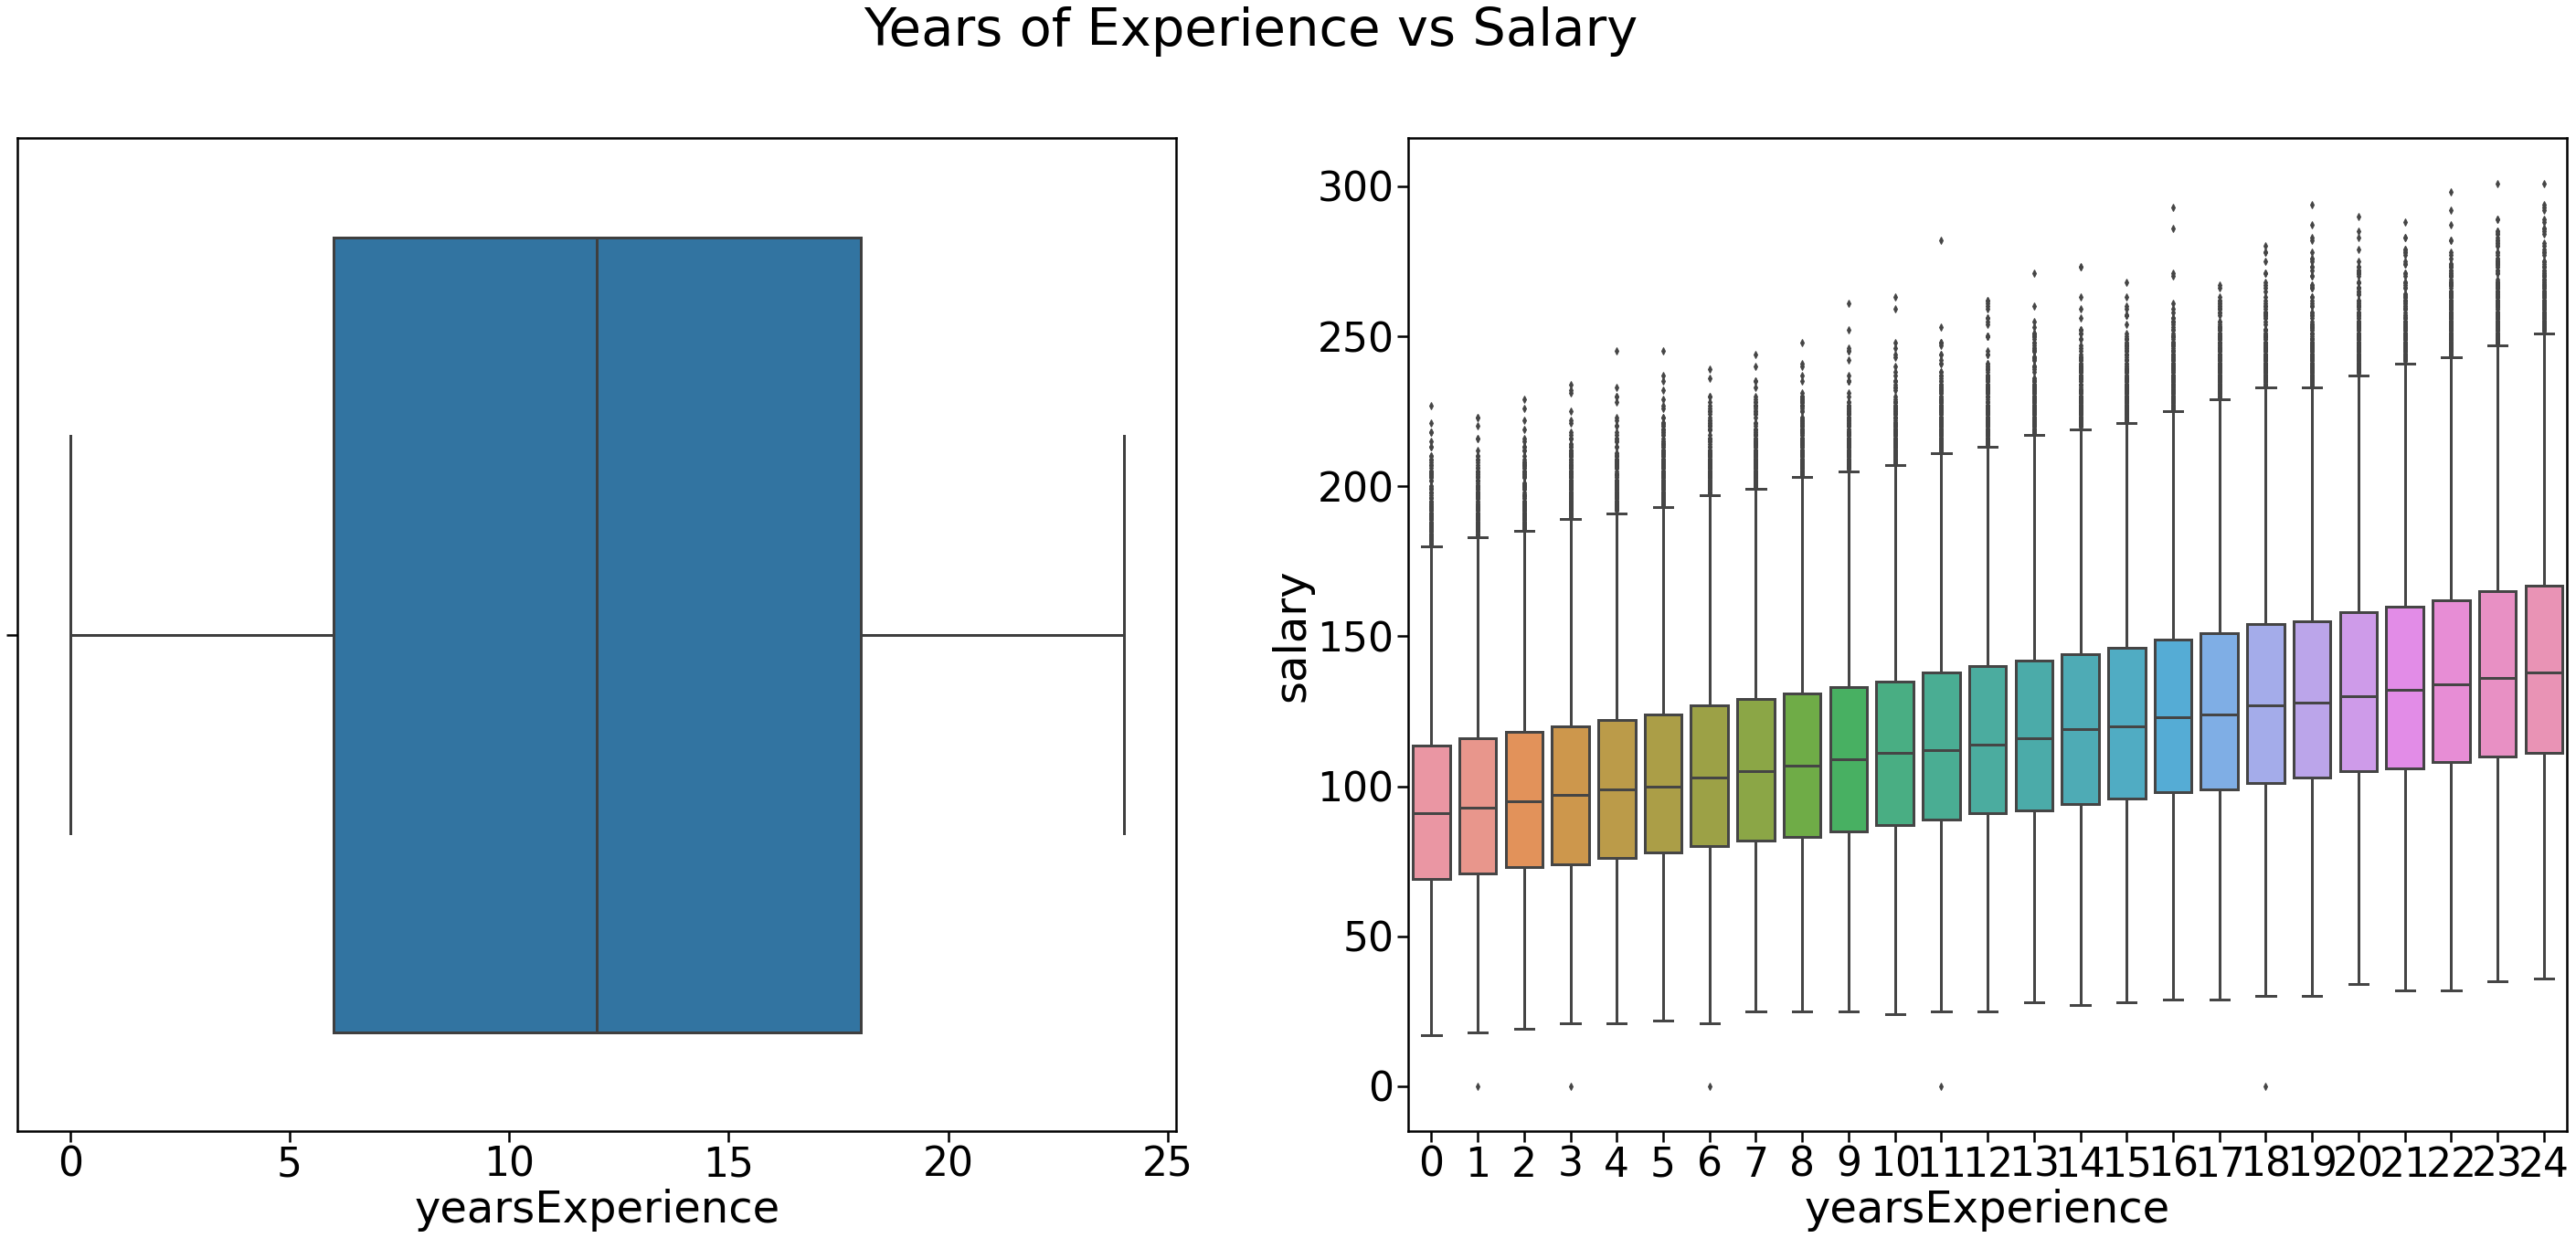

In [9]:
#visualizing years of experience vs salary
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
plt.subplot(1,2,1)
sns.boxplot(x = 'yearsExperience', data = train_df) 
plt.subplot(1,2,2)
sns.boxplot(x = 'yearsExperience', y = 'salary', data = train_df)
plt.suptitle('Years of Experience vs Salary') 
plt.show()

Salary appears to be positively correlated with years of experience.  As years of experience increases, salary increases slightly

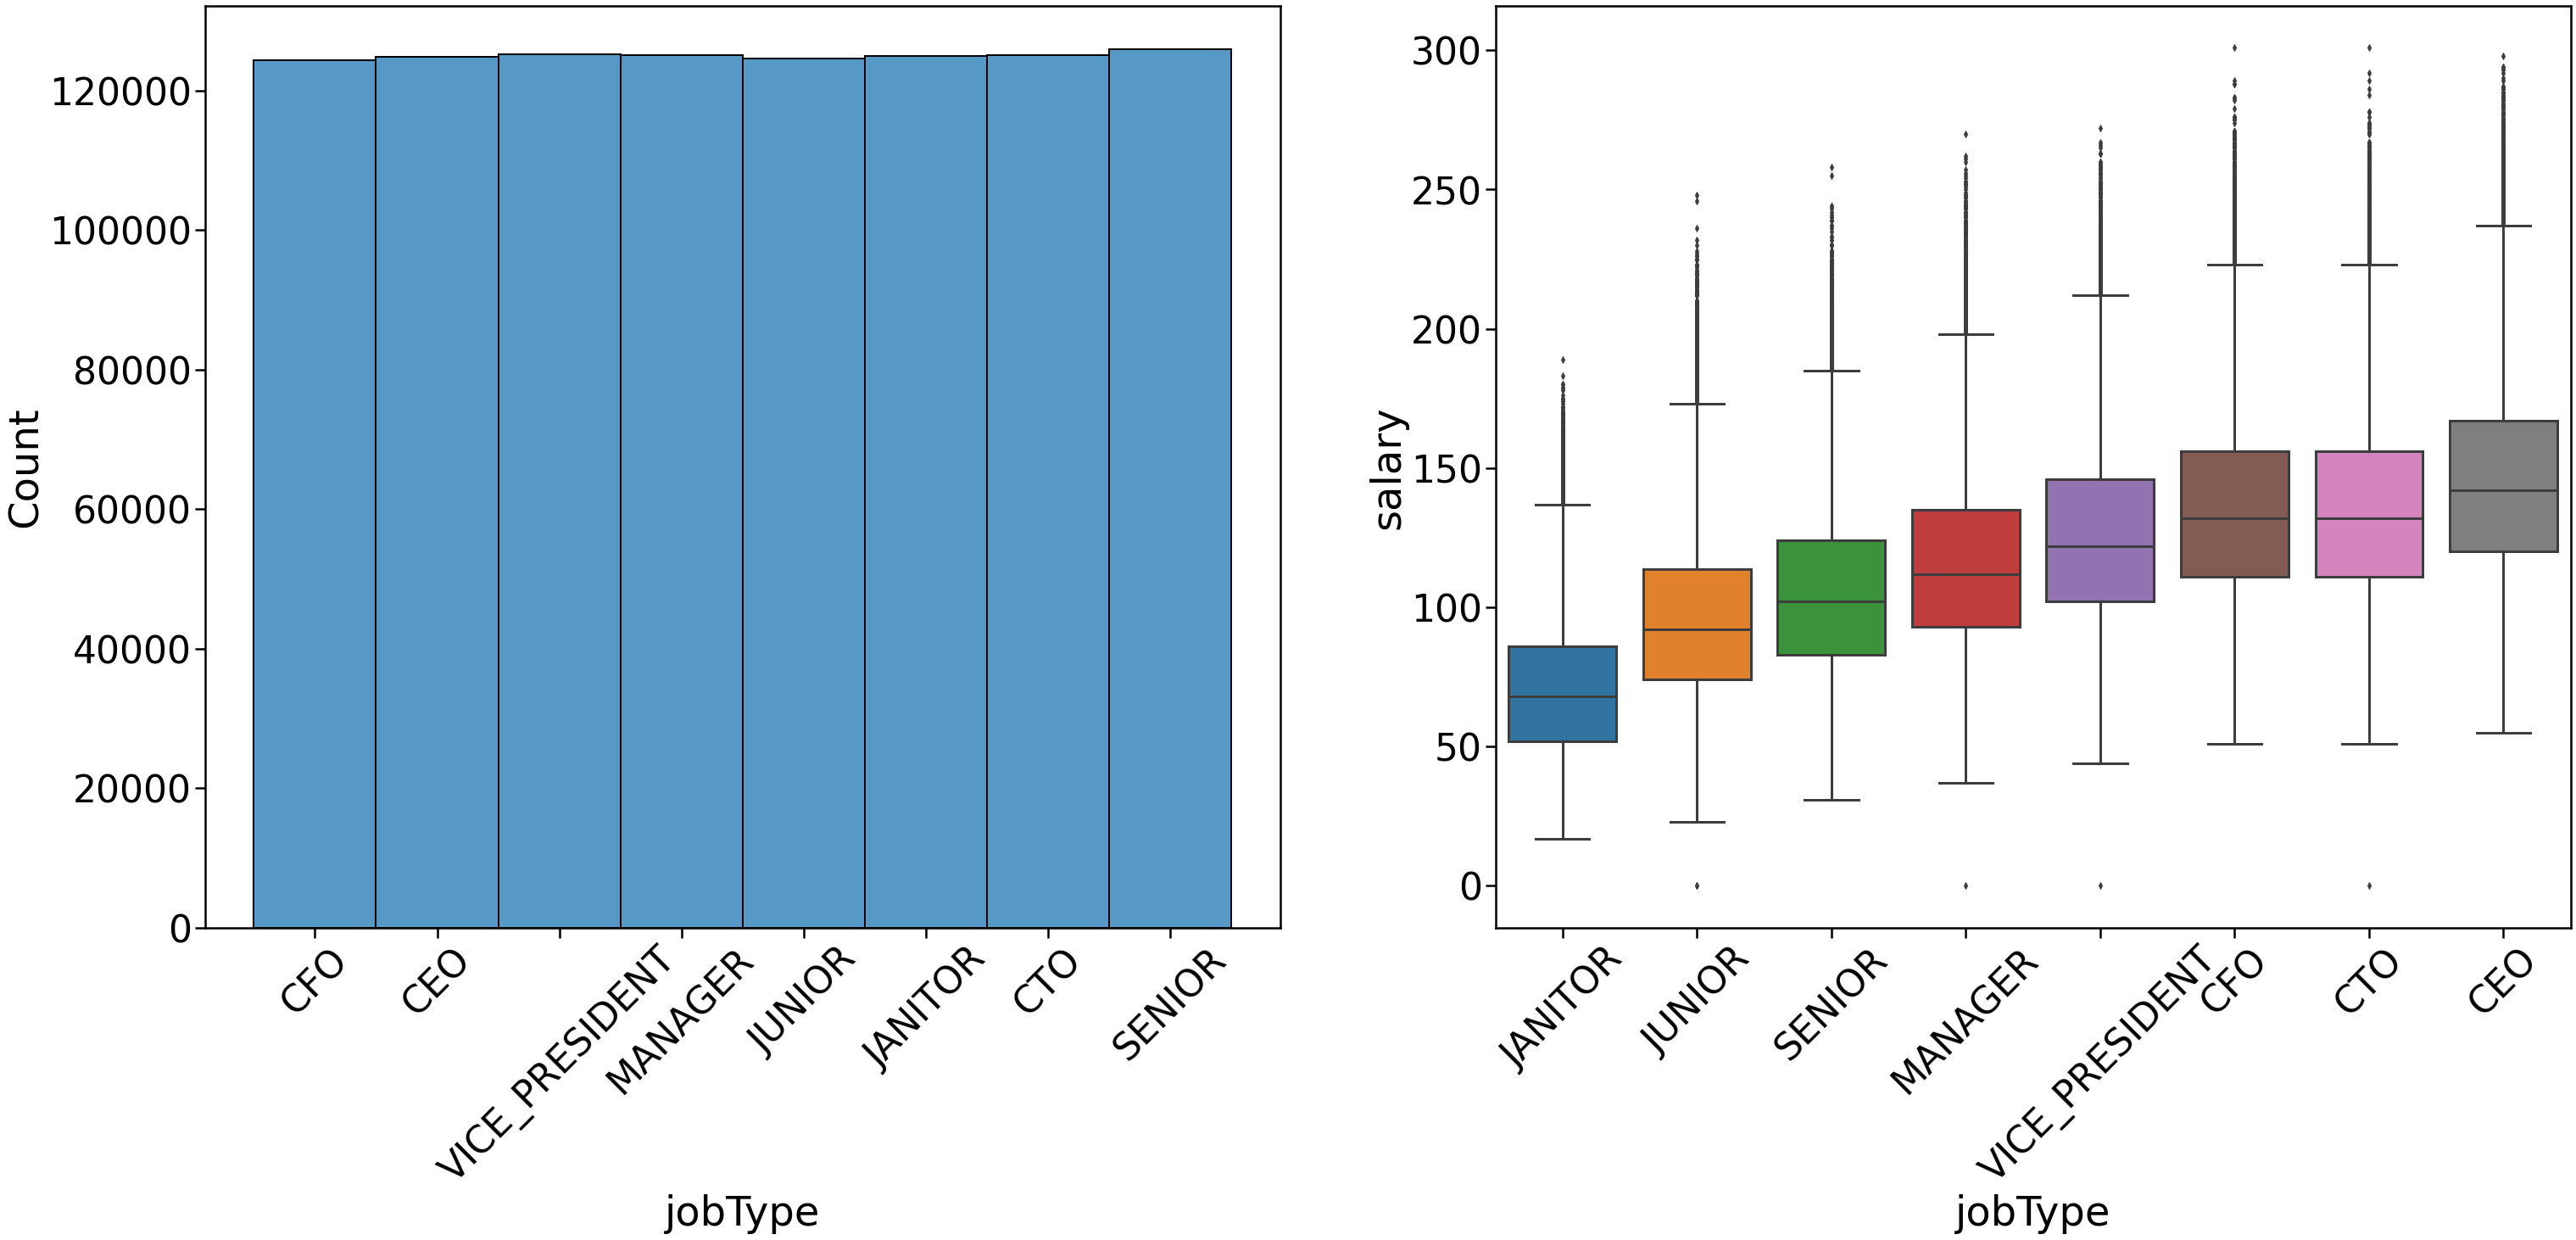

In [23]:
#visualizing job type vs salary
meanorder = train_df.groupby(by=['jobType'])['salary'].mean().sort_values().index
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
plt.subplot(1,2,1)
sns.histplot(x = 'jobType', data = train_df) 
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x='jobType', y='salary', data=train_df, order=meanorder)
plt.xticks(rotation=45)
plt.show()

Salary appears to be positively correlated with job types of advancing career progression

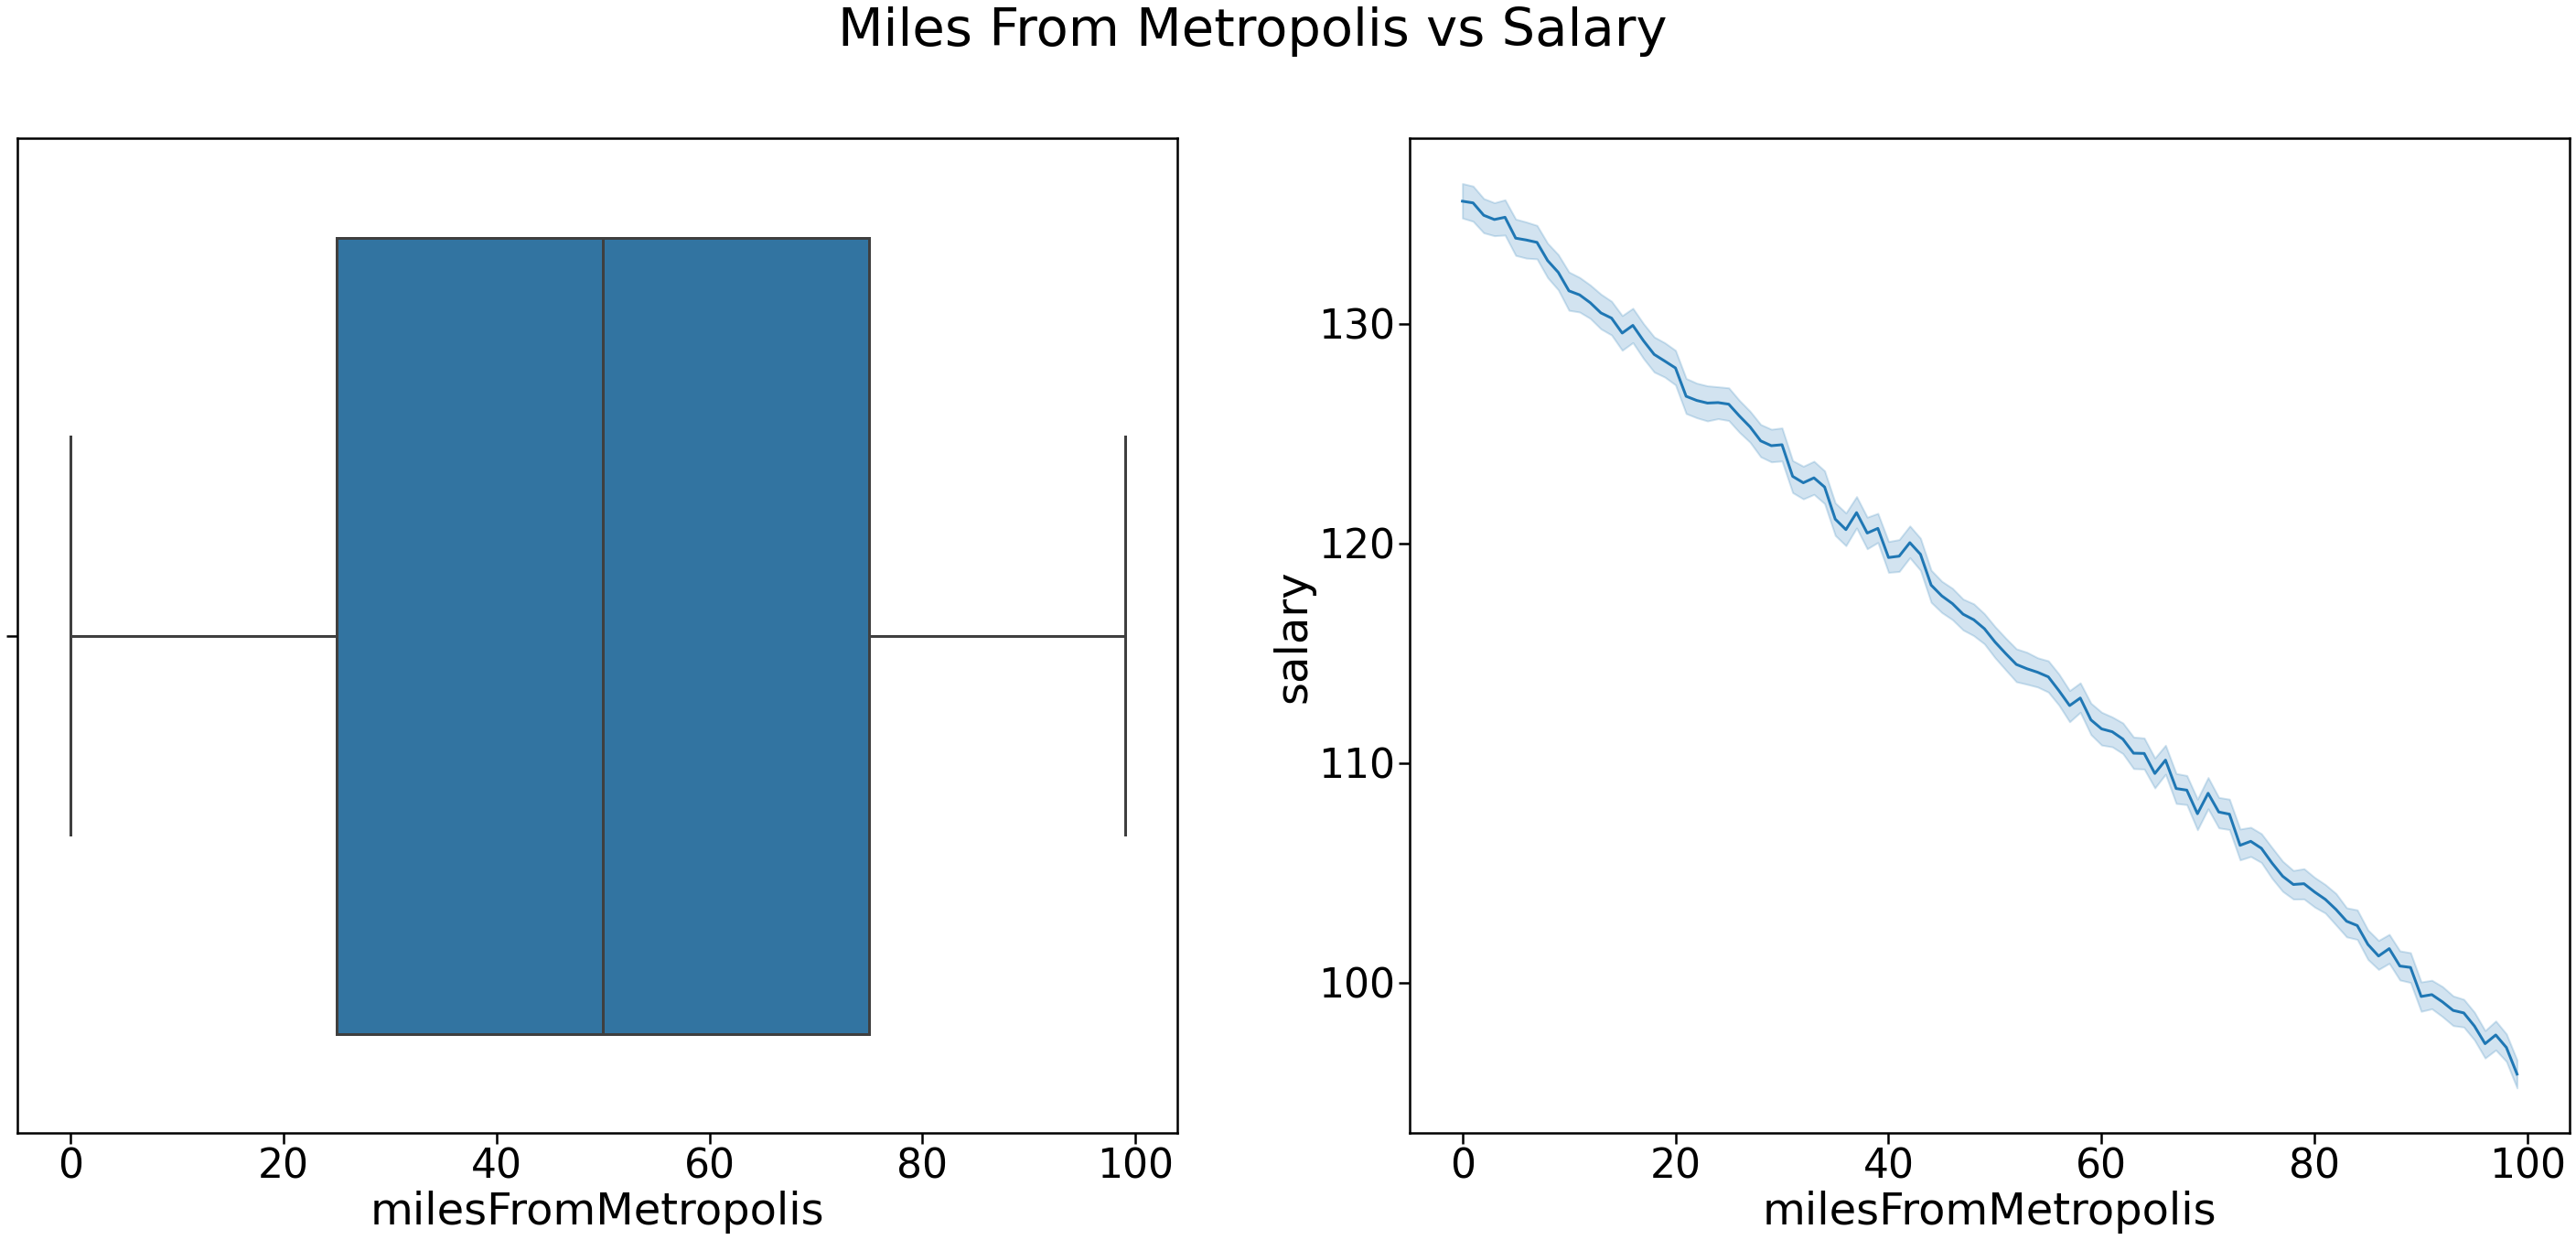

In [24]:
#visualizing miles from metropolis vs salary
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
plt.subplot(1,2,1)
sns.boxplot(x = 'milesFromMetropolis', data = train_df) 
plt.subplot(1,2,2)
sns.lineplot(x = 'milesFromMetropolis' , y = 'salary', data = train_df)
plt.suptitle('Miles From Metropolis vs Salary') 
plt.show()

Salary appears to be negatively correlated with miles from metropolis of each position.  The further from metropolis, the lower the salary.

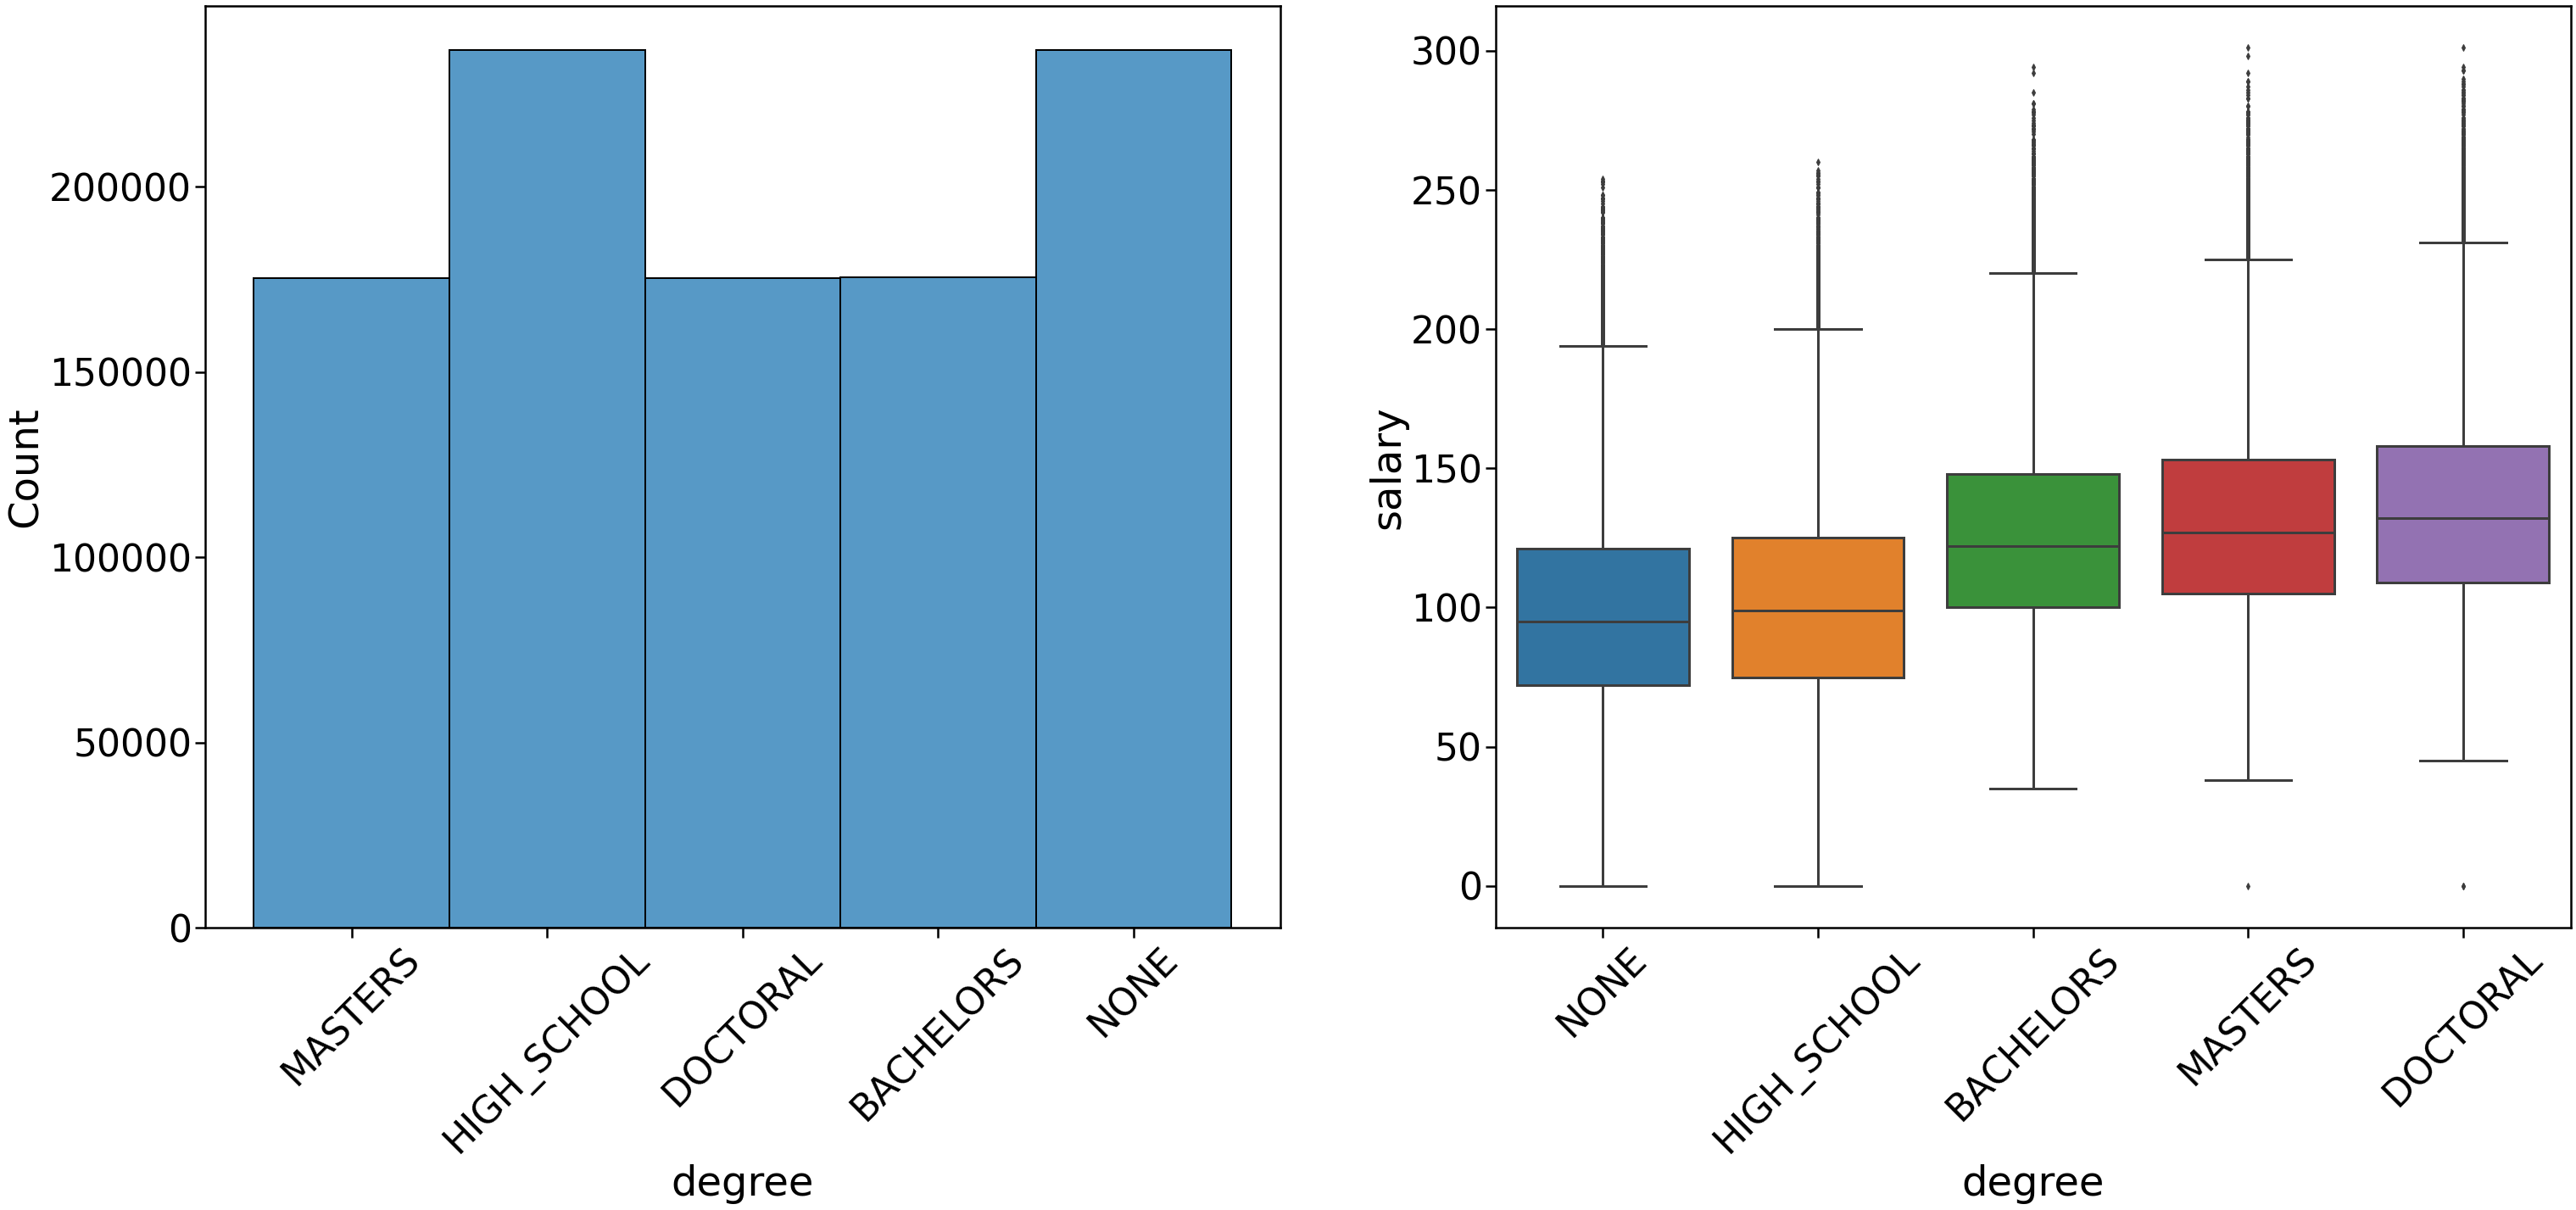

In [34]:
#visualizing degree vs salary
meanorder = train_df.groupby(by=['degree'])['salary'].mean().sort_values().index
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
plt.subplot(1,2,1)
sns.histplot(x = 'degree', data = train_df) 
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x='degree', y='salary', data=train_df, order=meanorder)
plt.xticks(rotation=45)
plt.show()

Salary appears to be positively correlated with degree.  The more advanced the degree, the higher the salary.

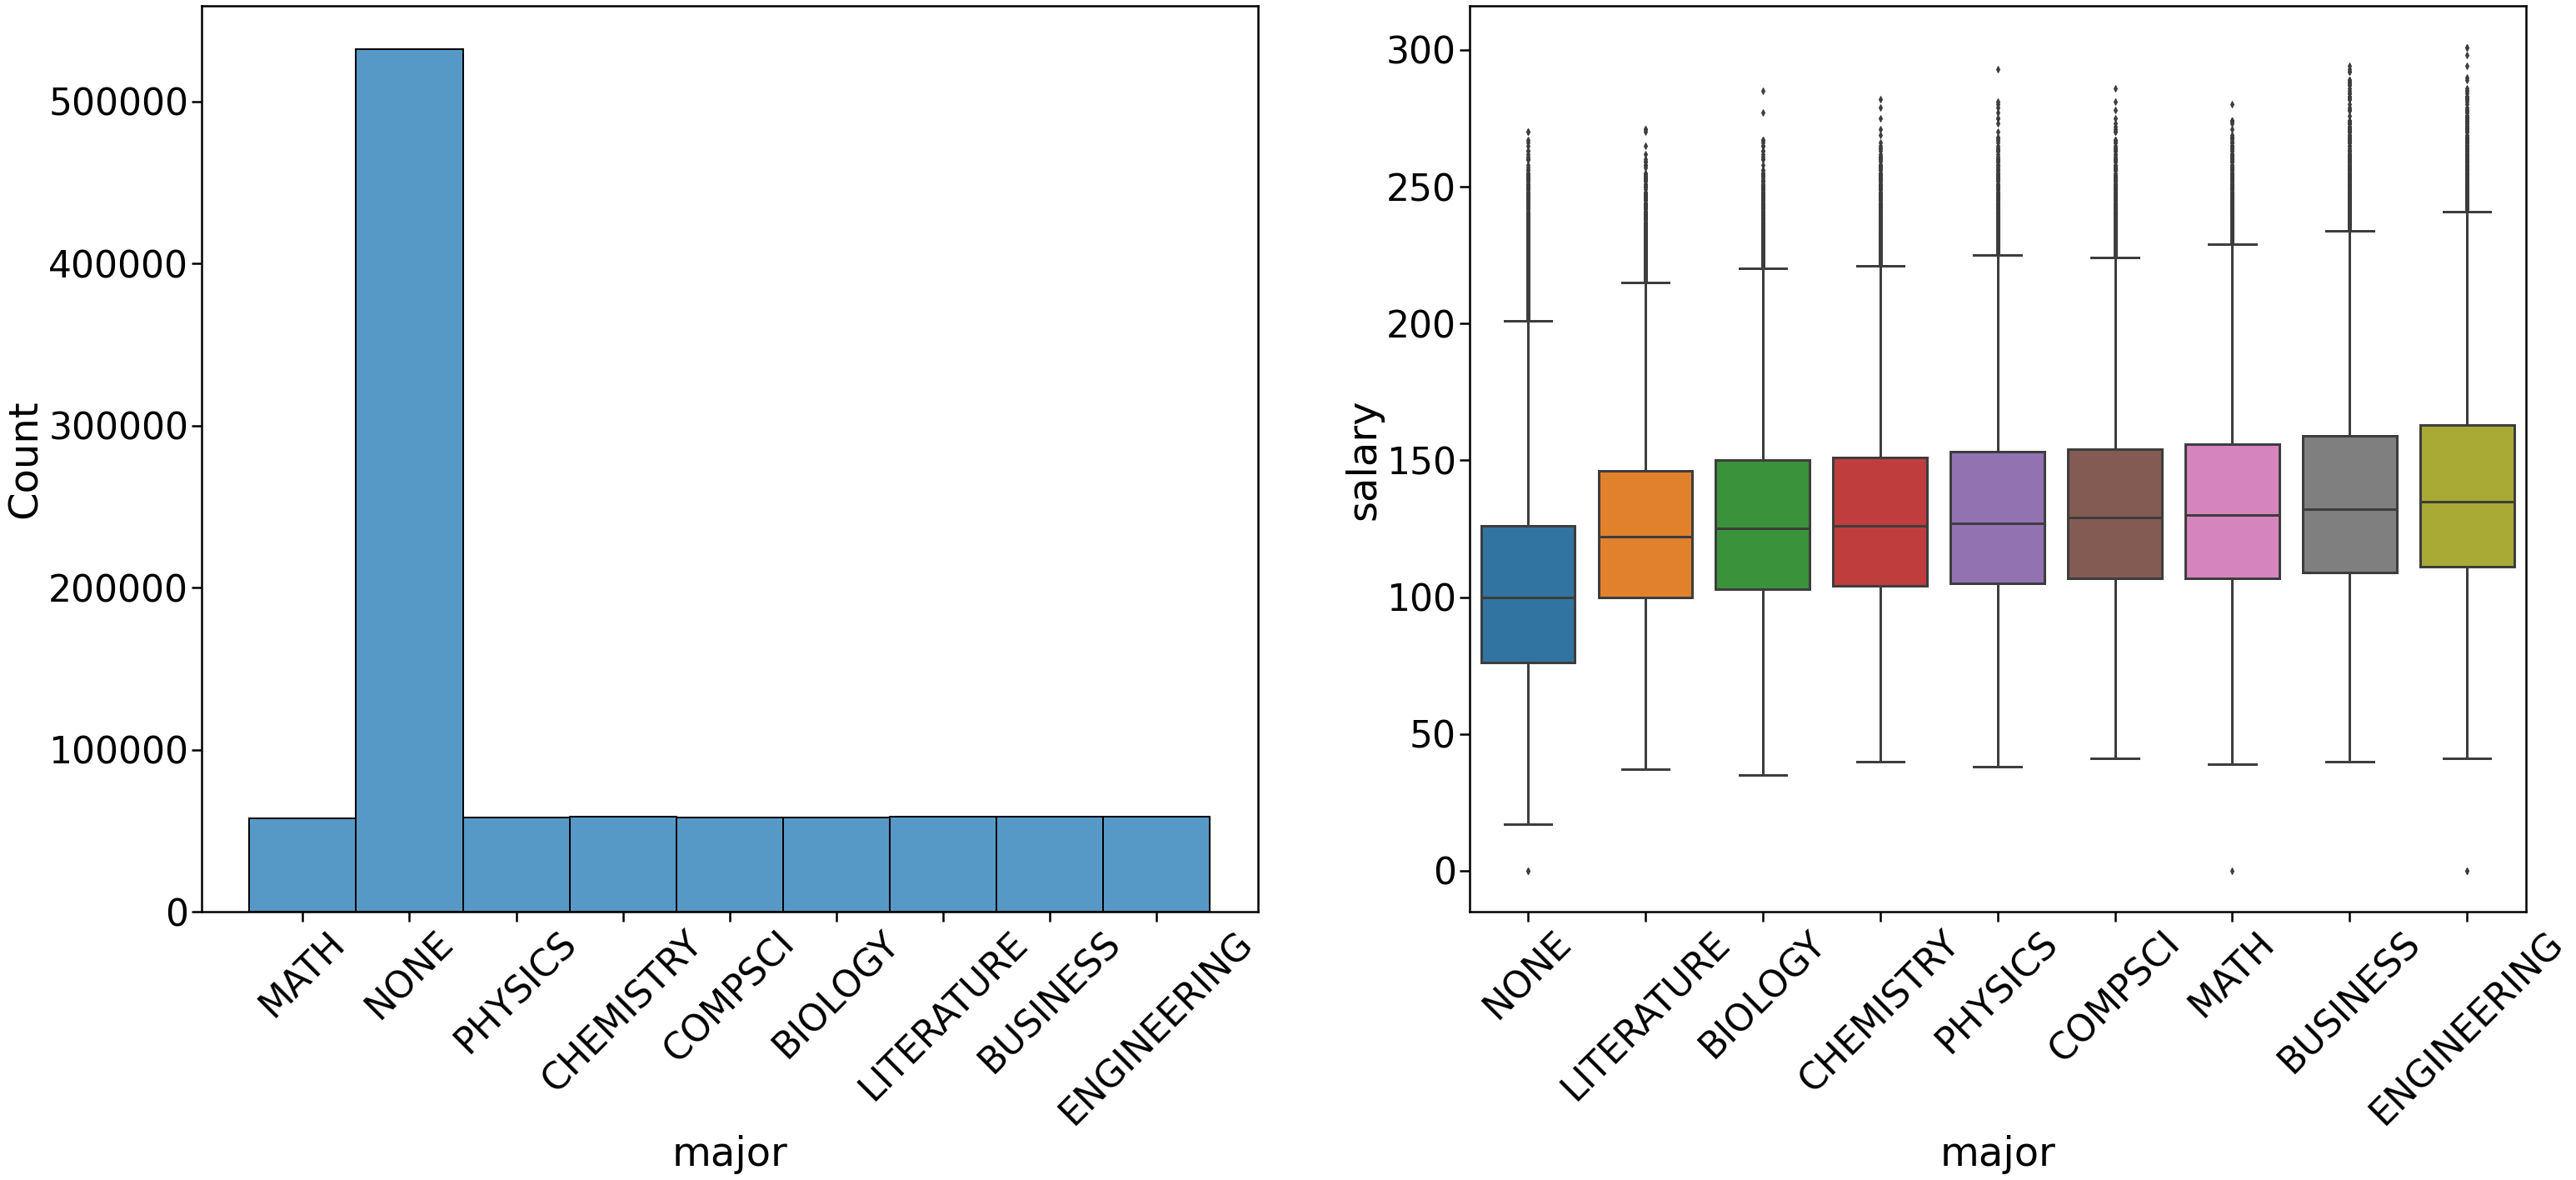

In [35]:
#visualizing major vs salary
meanorder = train_df.groupby(by=['major'])['salary'].mean().sort_values().index
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
plt.subplot(1,2,1)
sns.histplot(x = 'major', data = train_df) 
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x='major', y='salary', data=train_df, order=meanorder)
plt.xticks(rotation=45)
plt.show()

Salary does not appear to have a strong correlation with major, with the exception of no major having a slightly lower salary and enginereering having a slightly higher salary

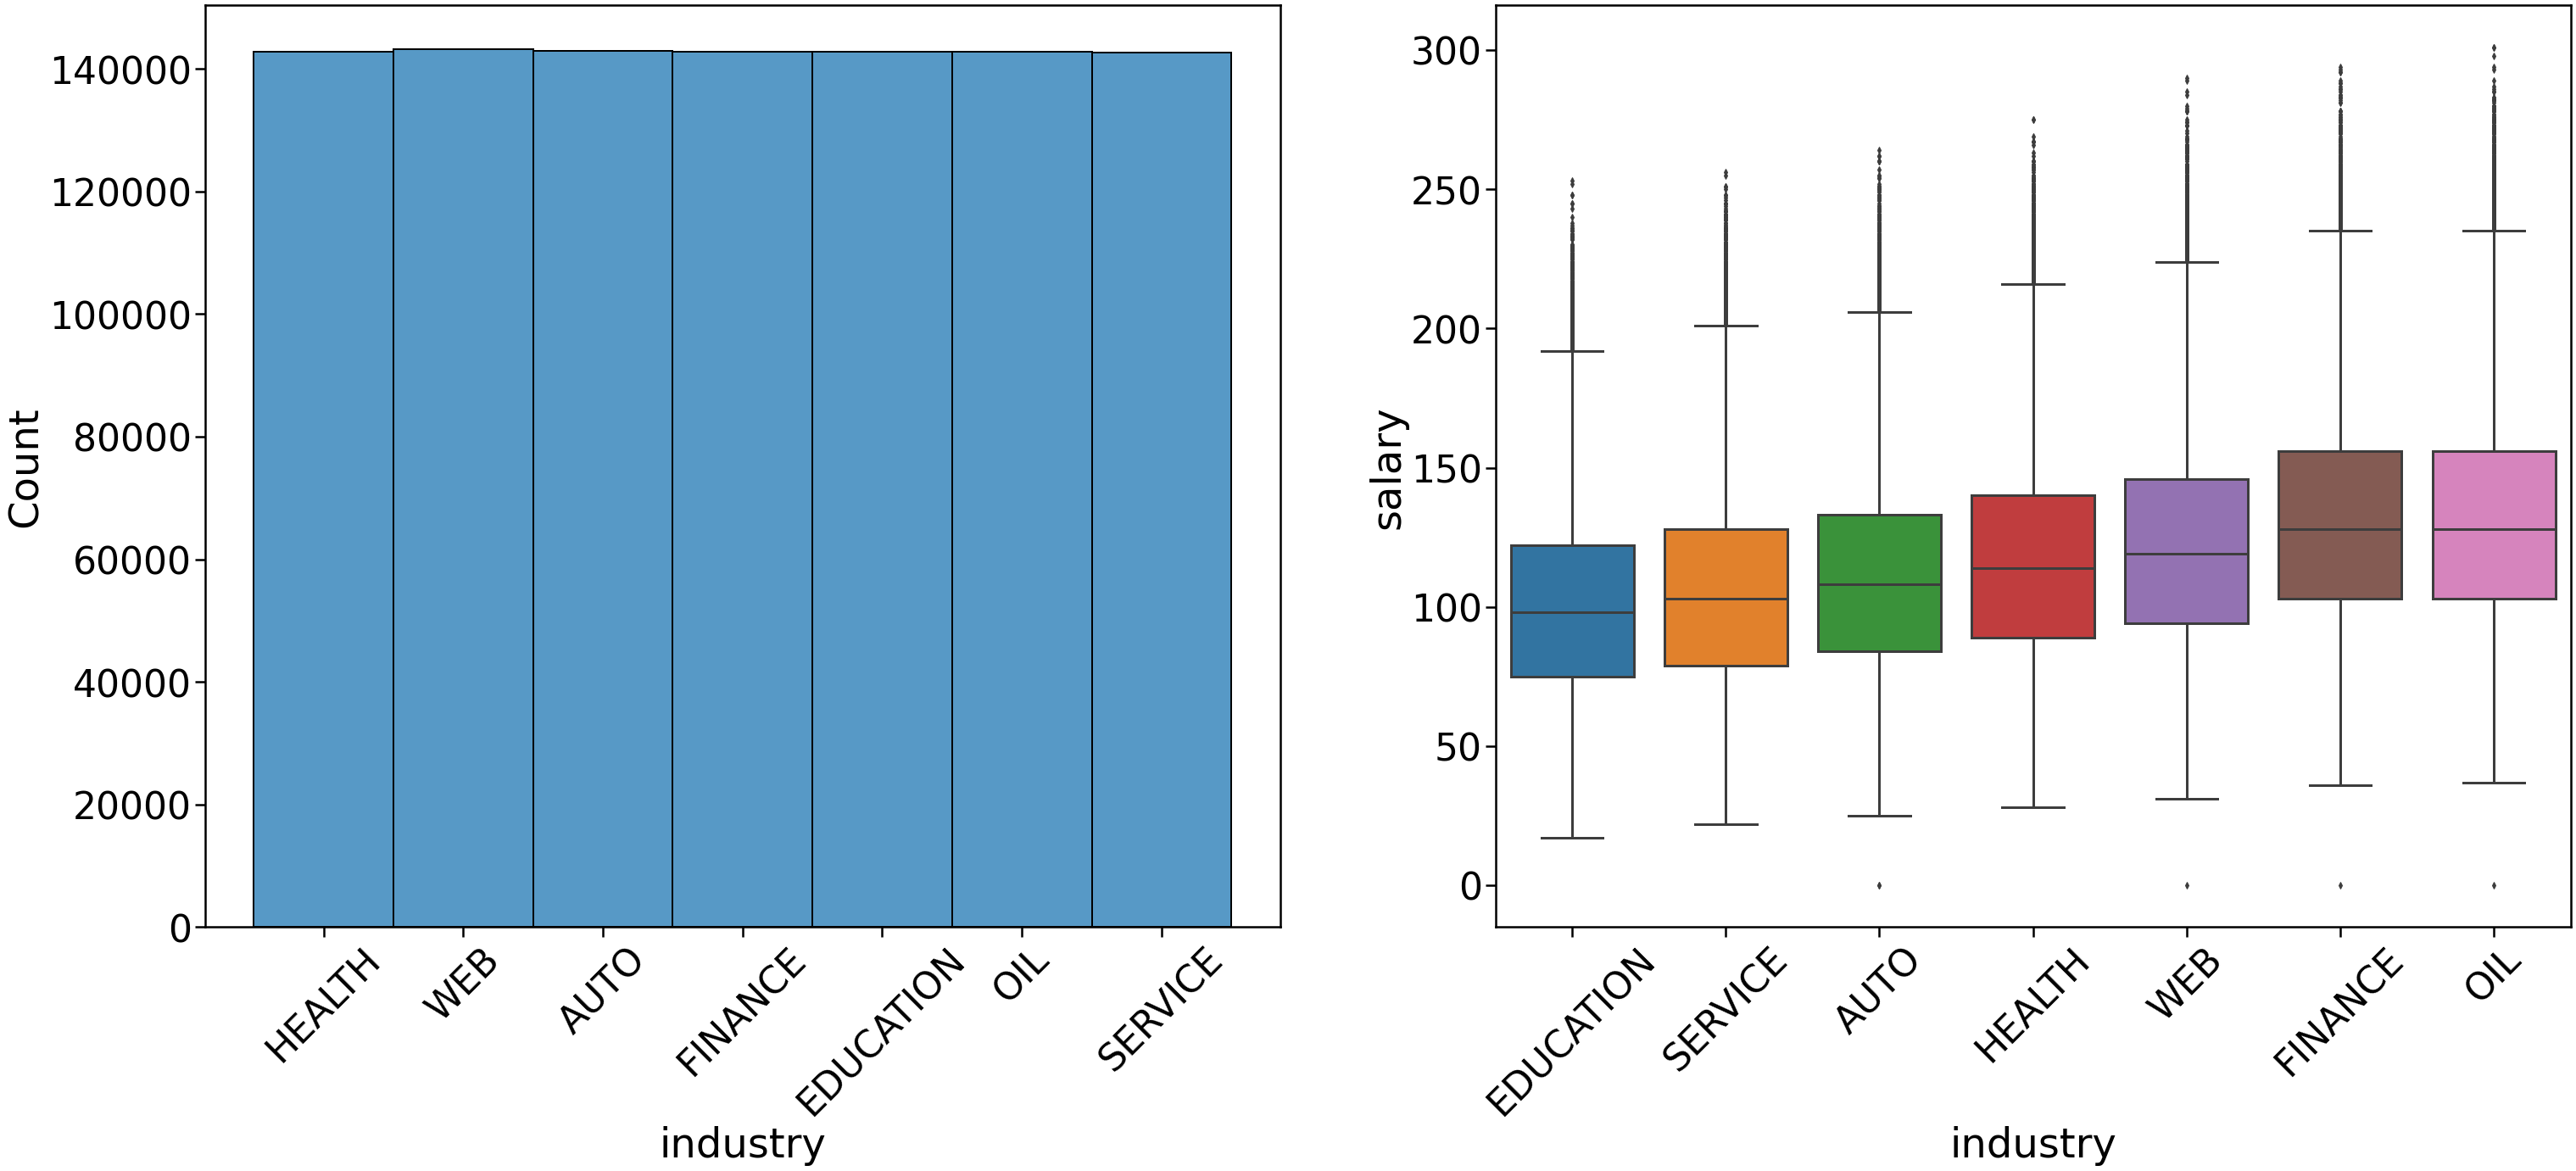

In [36]:
#visualizing industry vs salary
meanorder = train_df.groupby(by=['industry'])['salary'].mean().sort_values().index
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
plt.subplot(1,2,1)
sns.histplot(x = 'industry', data = train_df) 
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x='industry', y='salary', data=train_df, order=meanorder)
plt.xticks(rotation=45)
plt.show()

Salary appears to be slightly correlated with industry.  Some industries earn slightly more than others

In [8]:
#encoding categorical columns as 
train_df2 = train_df.copy()
le = preprocessing.LabelEncoder()

In [9]:
#encoding jobType
le.fit(train_df['jobType'])
train_df2['jobType'] = le.transform(train_df['jobType'])

In [10]:
#encoding degree
le.fit(train_df['degree'])
train_df2['degree'] = le.transform(train_df['degree'])

In [11]:
#encoding major
le.fit(train_df['major'])
train_df2['major'] = le.transform(train_df['major'])

In [12]:
#encoding industry
le.fit(train_df['industry'])
train_df2['industry'] = le.transform(train_df['industry'])

In [13]:
train_df2.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,1,3,6,3,10,83,130
1,JOB1362684407688,COMP19,0,2,7,6,3,73,101
2,JOB1362684407689,COMP52,7,1,8,3,10,38,137
3,JOB1362684407690,COMP38,5,1,2,0,8,17,142
4,JOB1362684407691,COMP7,7,0,8,2,8,16,163


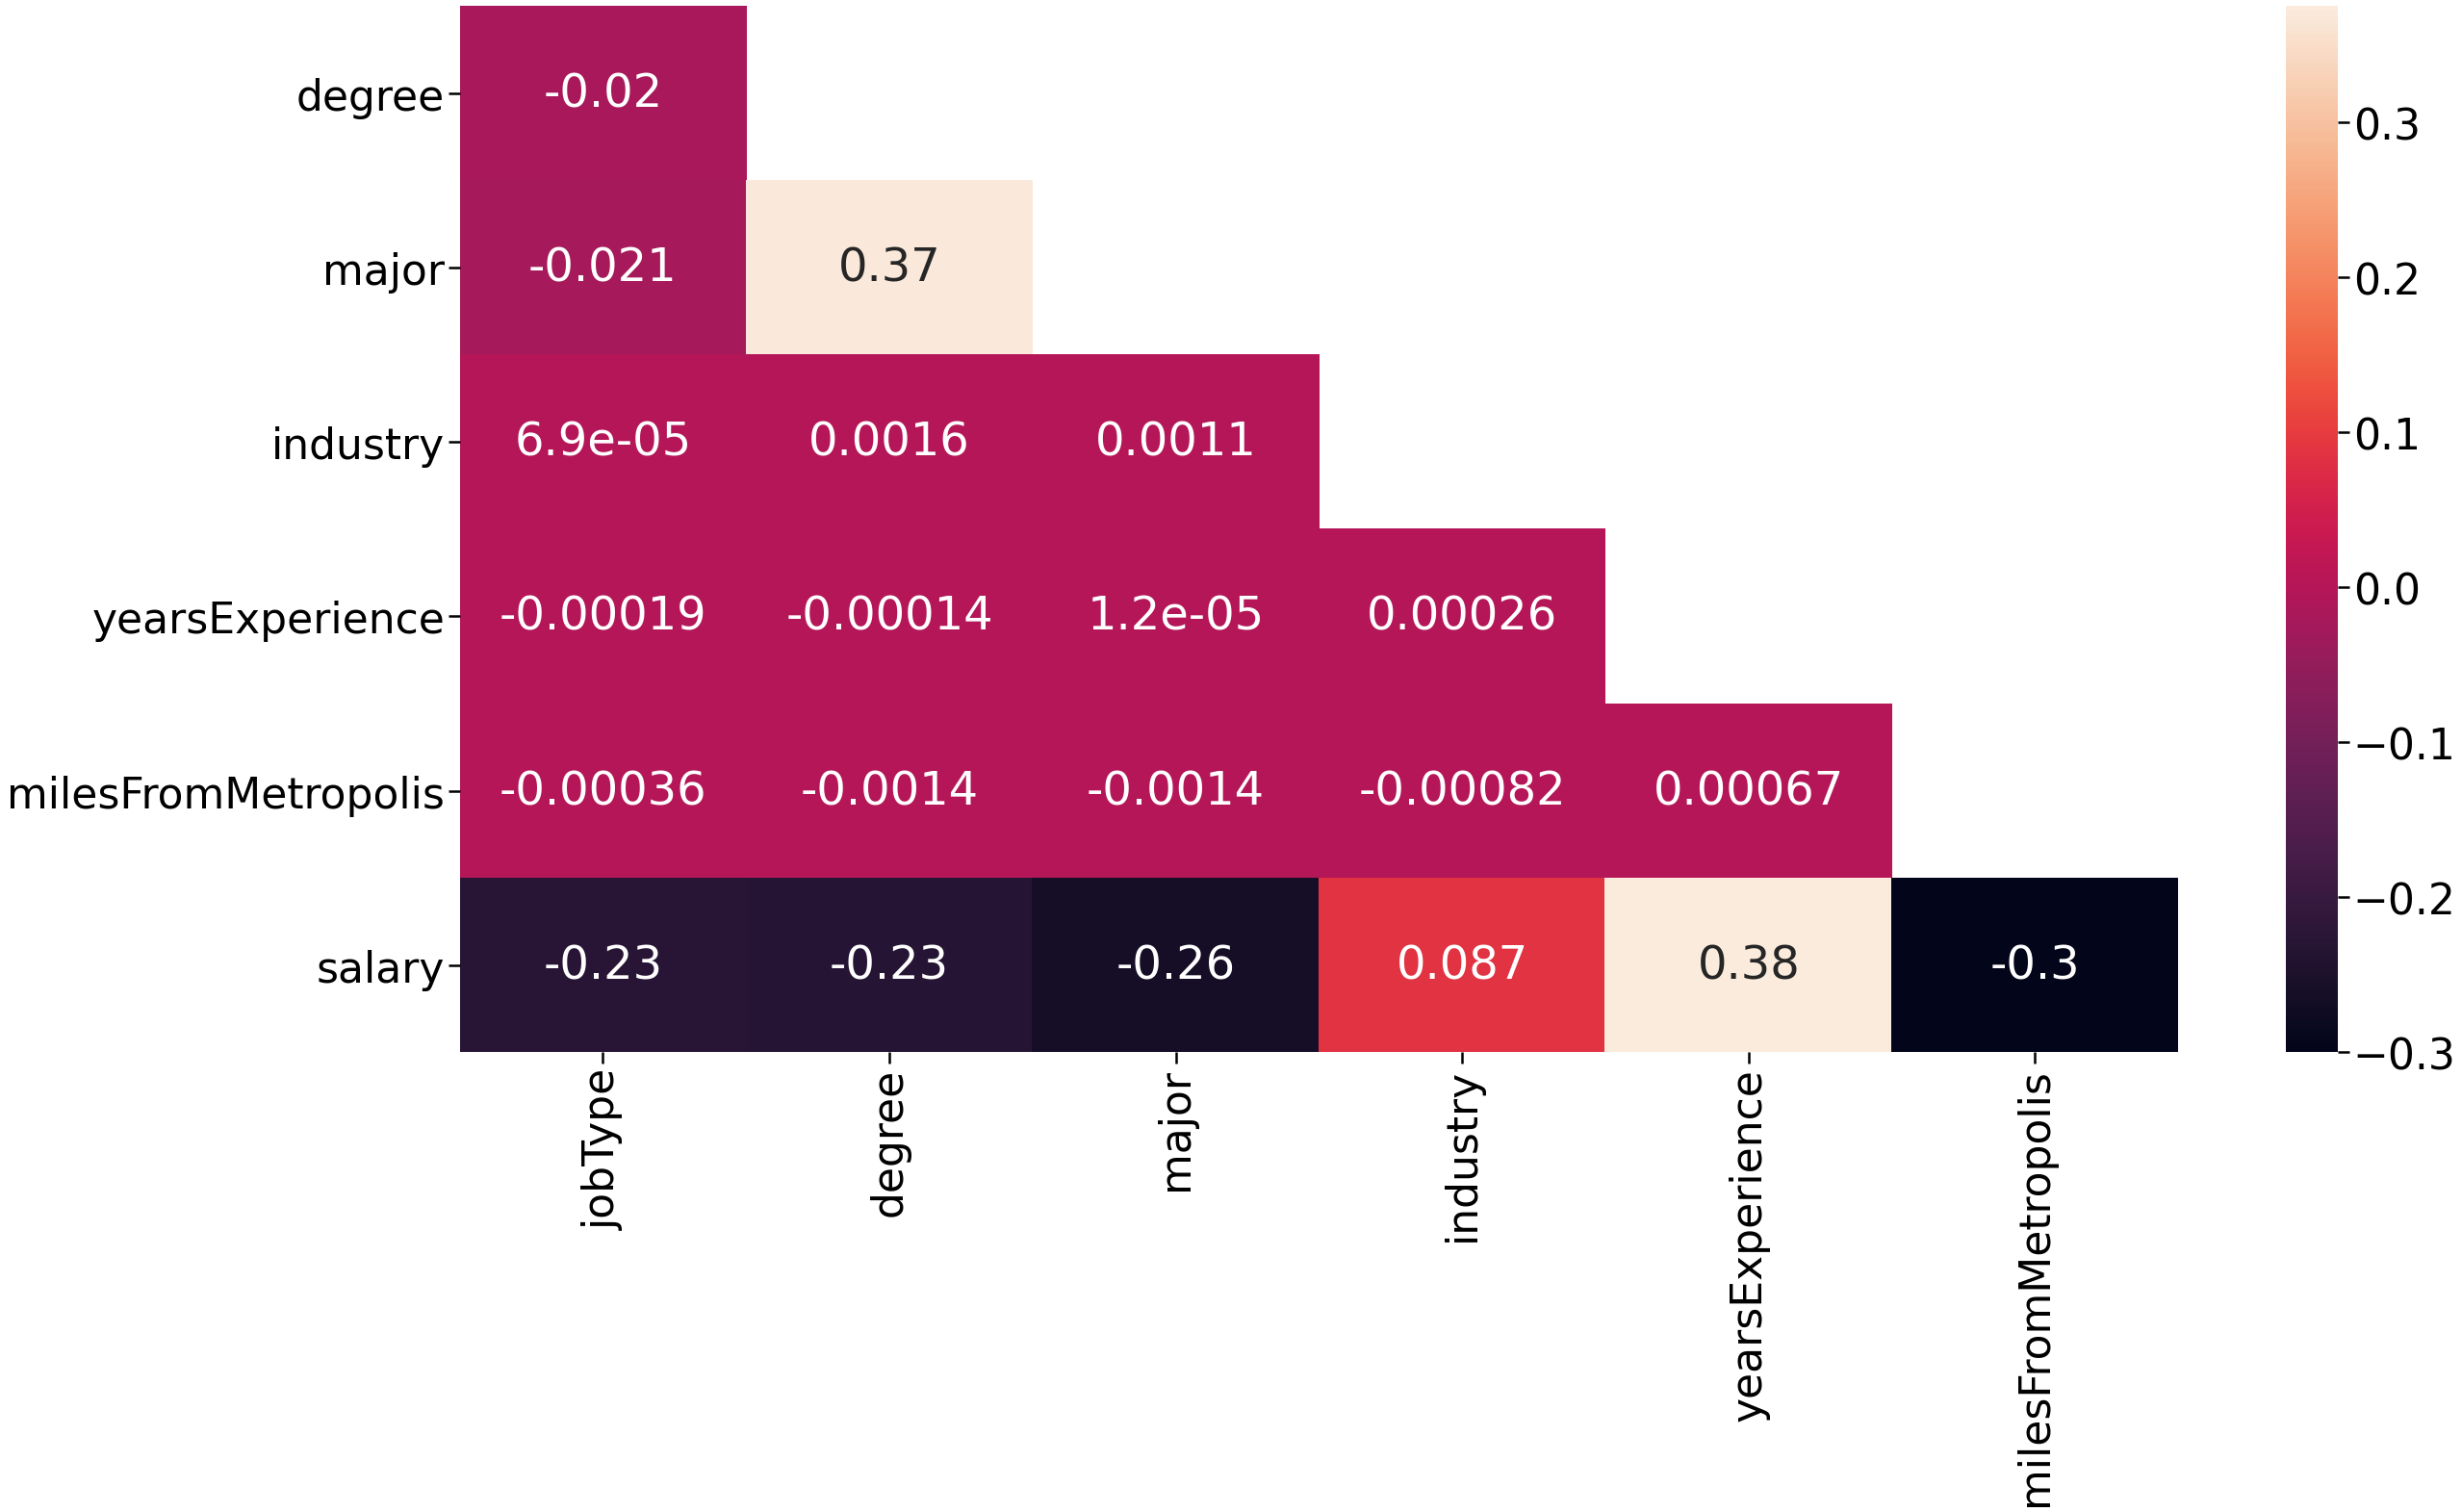

In [31]:
#visualizing between features
plt.figure(figsize = (40, 20)) 
sns.set_context("poster", font_scale=2)
features = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis', 'salary']
sns.diverging_palette(130, 50, as_cmap=True)
df_corr = train_df2[features].corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
sns.heatmap(corr, annot=True, mask=mask, vmin=-0.3)
plt.show()

The feature variables are not very correlated with each other

### ---- 5 Establish a baseline ----

In [41]:
#creating simple model to measure efficacy
train_df_bl = train_df.groupby('industry', as_index = False).mean()
train_df_bl.rename(columns = {'salary':'avg_salary'}, inplace = True)
train_df_bl = df_baseline[['industry', 'avg_salary']]
train_df_bl

,industry,avg_salary
0,AUTO,109.433690
1,EDUCATION,99.448386
2,FINANCE,130.746743
3,HEALTH,115.735540
4,OIL,130.952946
5,SERVICE,104.446820
6,WEB,121.644512


In [42]:
train_df2 = pd.merge(train_df, train_df_bl, on='industry')
train_df2

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,avg_salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,115.73554
1,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,115.73554
2,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178,115.73554
3,JOB1362684407697,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24,30,102,115.73554
4,JOB1362684407709,COMP30,JUNIOR,BACHELORS,LITERATURE,HEALTH,18,69,105,115.73554
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407660,COMP58,MANAGER,DOCTORAL,LITERATURE,SERVICE,3,51,117,104.44682
999996,JOB1362685407663,COMP61,VICE_PRESIDENT,MASTERS,LITERATURE,SERVICE,18,72,112,104.44682
999997,JOB1362685407665,COMP53,VICE_PRESIDENT,NONE,NONE,SERVICE,18,94,93,104.44682
999998,JOB1362685407671,COMP1,CTO,NONE,NONE,SERVICE,6,20,110,104.44682


In [40]:
#measuring MSE of baseline
mean_squared_error(train_df2.salary, train_df2.avg_salary)

1367.1891080861153

### ---- 6 Hypothesize solution ----

3 models that may improve results over the mean are... 
- linear regression because the relationships between the features and targets appear to be linear and we're attempting to find a continuous value
- random forest regression because the relationships may not be very linear
- gradient boosting regression because this should give us improved accuracy over random forest

## Part 3 - DEVELOP

Cycling through creating features, tuning models, and training / validing models (steps 7-9) until reaching efficacy goal. Metric will be MSE and goal is: <370 

### ---- 7 Engineer features  ----

In [7]:
x = train_df.iloc[:,:-1]

In [8]:
#dropping jobid and company id because no correlation
x = x.drop(columns=['jobId','companyId'])

In [9]:
#getting dummy values for categorical variables 
x = pd.get_dummies(data=x, columns=['jobType' , 'degree' , 'major', 'industry'])

In [10]:
#scaling min max values 
scaler = MinMaxScaler()
x[['yearsExperience', 'milesFromMetropolis']] = scaler.fit_transform(x[['yearsExperience', 'milesFromMetropolis']])

In [39]:
x

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,0.416667,0.838384,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0.125000,0.737374,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.416667,0.383838,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0.333333,0.171717,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.333333,0.161616,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.791667,0.949495,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
999996,0.500000,0.353535,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
999997,0.666667,0.818182,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
999998,0.250000,0.050505,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [11]:
y = train_df.iloc[:,-1:].values
y

array([[130],
       [101],
       [137],
       ...,
       [ 64],
       [149],
       [ 88]])

In [12]:
#defining train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### ---- 8 Creating models ----

In [15]:
#do i need this

#create and tune the models that you brainstormed during part 2

In [29]:
#creating linear regression object
print('starting...')
lr = linear_model.LinearRegression()

#training the model using the training sets
lr.fit(x_train, y_train)

#making predictions using the testing set
y_pred = lr.predict(x_test)

#getting Mean Squared Error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

starting...
Mean squared error: 384.16


In [36]:
#creating random forest regressor object
print('starting...')
RFreg = RandomForestRegressor(n_estimators = 100, max_depth = 15, max_features = 15, random_state = 0)
  
#fitting the regressor with x and y data
RFreg.fit(x_train, y_train.ravel())  

#making predictions using the testing set
y_pred = RFreg.predict(x_test)  

#getting Mean Squared Error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

starting...
Mean squared error: 375.41


In [1]:
# getting best hyperparameters
param = {'max_depth': [5, 10, 20, None],
         'learning_rate':[.01, 1.0, 10], 
         'max_features':[10, 20, 30],
         'min_samples_split': [5, 10, 20]}

In [62]:
rnd_search = RandomizedSearchCV(GradientBoostingRegressor(), param, 
n_iter =10, cv=2)
rnd_search.fit(x,y.ravel())
print(rnd_search.best_params_)
print(rnd_search.best_score_)

/home/kevin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:925: RuntimeWarning: overflow encountered in square
  array_stds = np.sqrt(np.average((array -


{'min_samples_split': 10, 'max_features': 30, 'max_depth': 5, 'learning_rate': 1.0}
0.7575668218658309


In [64]:
rnd_search.best_params_

{'min_samples_split': 10,
 'max_features': 30,
 'max_depth': 5,
 'learning_rate': 1.0}

In [65]:
rnd_search.best_score_

0.7575668218658309

In [13]:
#creating gradient boosting regressor object
GBreg = GradientBoostingRegressor(learning_rate = 1, max_depth = 5, max_features = 30, min_samples_split = 10, n_estimators = 150, random_state = 0)

#fitting the regressor with x and y data
GBreg.fit(x_train, y_train.ravel())

#making predictions using the testing set
y_pred = GBreg.predict(x_test)

#getting Mean Squared Error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 362.51


### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

In [69]:
#do i need this?

scores = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=2)
mean_scores = scores.mean()

In [70]:
mean_scores

0.7439583441994482

In [31]:
cvlr = cross_val_score(lr, x, y, cv=5, scoring='neg_mean_squared_error')
mselr = np.average(cvlr)
print(mselr)

-384.416247434276


In [38]:
cvrf = cross_val_score(RFreg, x, y.ravel(), cv=5, scoring='neg_mean_squared_error')
mserf = np.average(cvrf)
print(mserf)

-374.98021228590505


In [34]:
cvgb = cross_val_score(GBreg, x, y.ravel(), cv=2, scoring='neg_mean_squared_error')
msegb = np.average(cvgb) 
print(msegb)

-364.7344790085994


### ---- 10 Select best model  ----

In [40]:
MSEdf = pd.DataFrame(columns = ['Model', 'MSE'])
MSEdf

,Model,MSE


In [41]:
MSEdf.loc[len(MSEdf.index)] = ['LR', mselr] 
MSEdf

,Model,MSE
0,LR,-384.416247


In [42]:
MSEdf.loc[len(MSEdf.index)] = ['RFreg', mserf]
MSEdf

,Model,MSE
0,LR,-384.416247
1,RFreg,-374.980212


In [43]:
MSEdf.loc[len(MSEdf.index)] = ['GBreg', msegb]
MSEdf

,Model,MSE
0,LR,-384.416247
1,RFreg,-374.980212
2,GBreg,-364.734479


In [44]:
MSEdf.min()

Model         GBreg
MSE     -384.416247
dtype: object

## Part 4 - DEPLOY

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [14]:
#preparing test features
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [15]:
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [16]:
#dropping unneeded columns
test_features = test_features.drop(columns=['jobId','companyId'])
test_features.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [17]:
#converting categorical columns
test_features = pd.get_dummies(data=test_features, columns=['jobType' , 'degree' , 'major', 'industry'])
test_features.head()

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,22,73,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,20,47,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,17,9,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,14,96,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,10,44,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
#scaling numerical columns 
test_features[['yearsExperience', 'milesFromMetropolis']] = scaler.fit_transform(test_features[['yearsExperience', 'milesFromMetropolis']])

In [19]:
test_features.head()

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,0.916667,0.737374,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0.833333,0.474747,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,0.708333,0.090909,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.583333,0.969697,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.416667,0.444444,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
#predicting based on test set
y_predtest = GBreg.predict(test_features)

In [21]:
#may want to save into test set

#saving prediction to csv
y_predtest = pd.DataFrame(y_predtest, columns=['predictions']).to_csv('prediction.csv')

In [22]:
predictions = pd.read_csv('prediction.csv')
predictions

,Unnamed: 0,predictions
0,0,111.415792
1,1,90.415107
2,2,182.220718
3,3,102.395365
4,4,113.717682
...,...,...
999995,999995,168.558577
999996,999996,107.190326
999997,999997,55.317505
999998,999998,159.243345


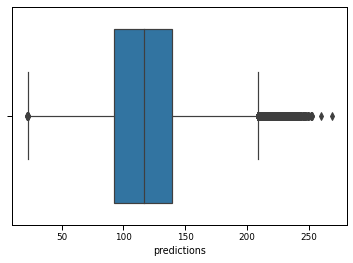

In [54]:
#what does this visualization even show

#visualization of predictions 
#plt.plot(predictions.predictions)

sns.set_context("paper", font_scale=1)
sns.boxplot(x = 'predictions', data = predictions)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

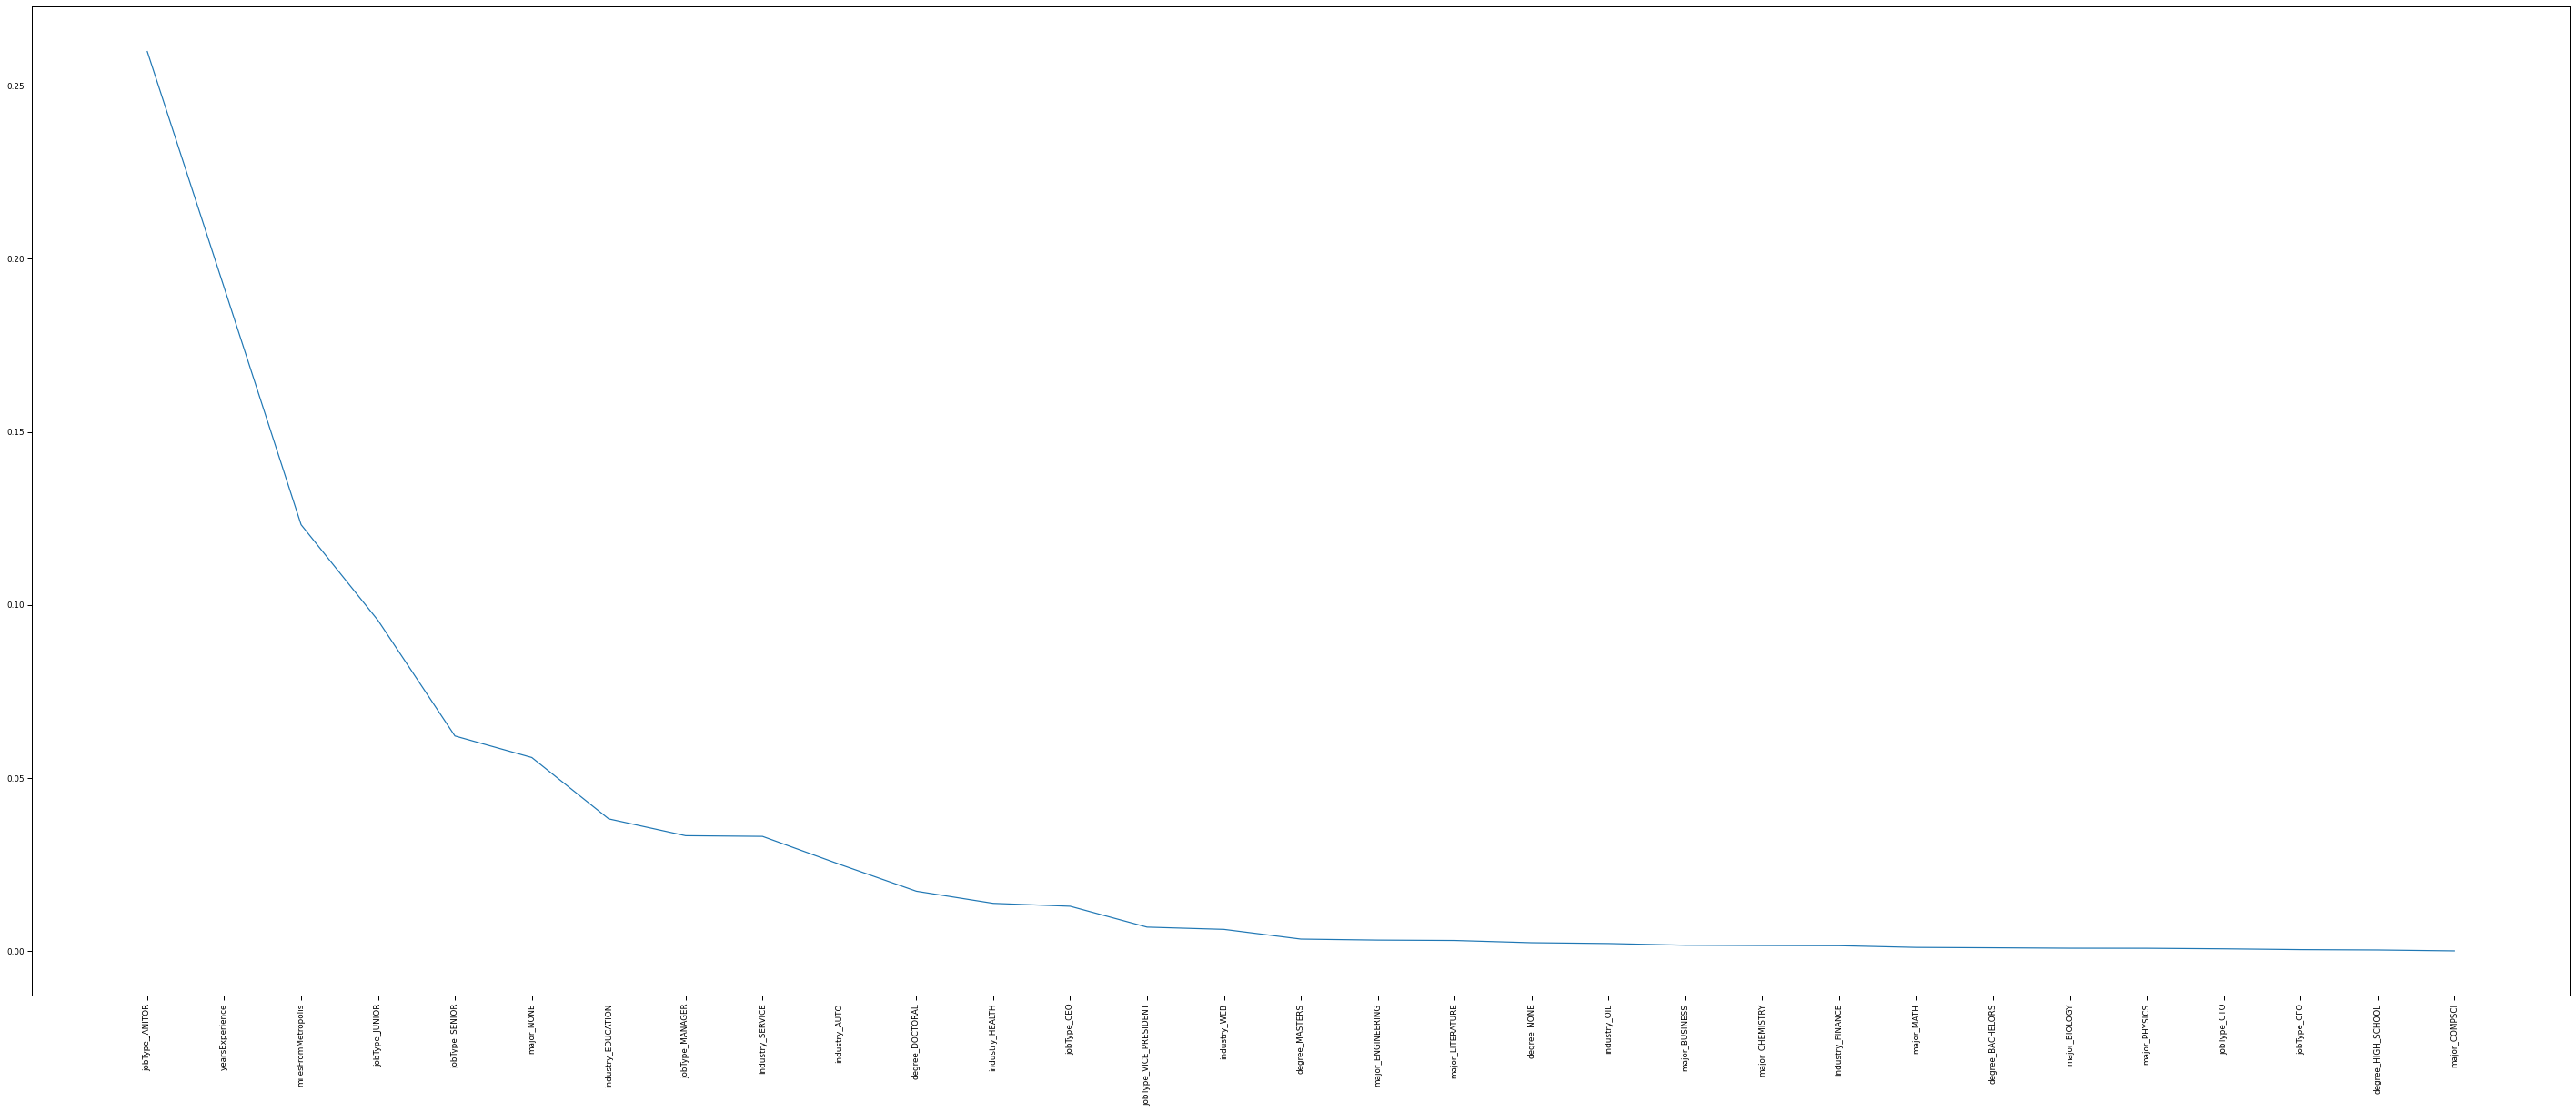

In [61]:
#getting feature importances
sns.set_context("paper", font_scale=1)
col_sorted_by_importance=np.flip(GBreg.feature_importances_.argsort())
feat_imp=pd.DataFrame({
    'cols':x.columns[col_sorted_by_importance],
    'imps':GBreg.feature_importances_[col_sorted_by_importance]
})

#do i need this?
plt.figure(figsize = (50, 20)) 
plt.plot('cols','imps', data=feat_imp)
plt.xticks(rotation=90)
plt.show

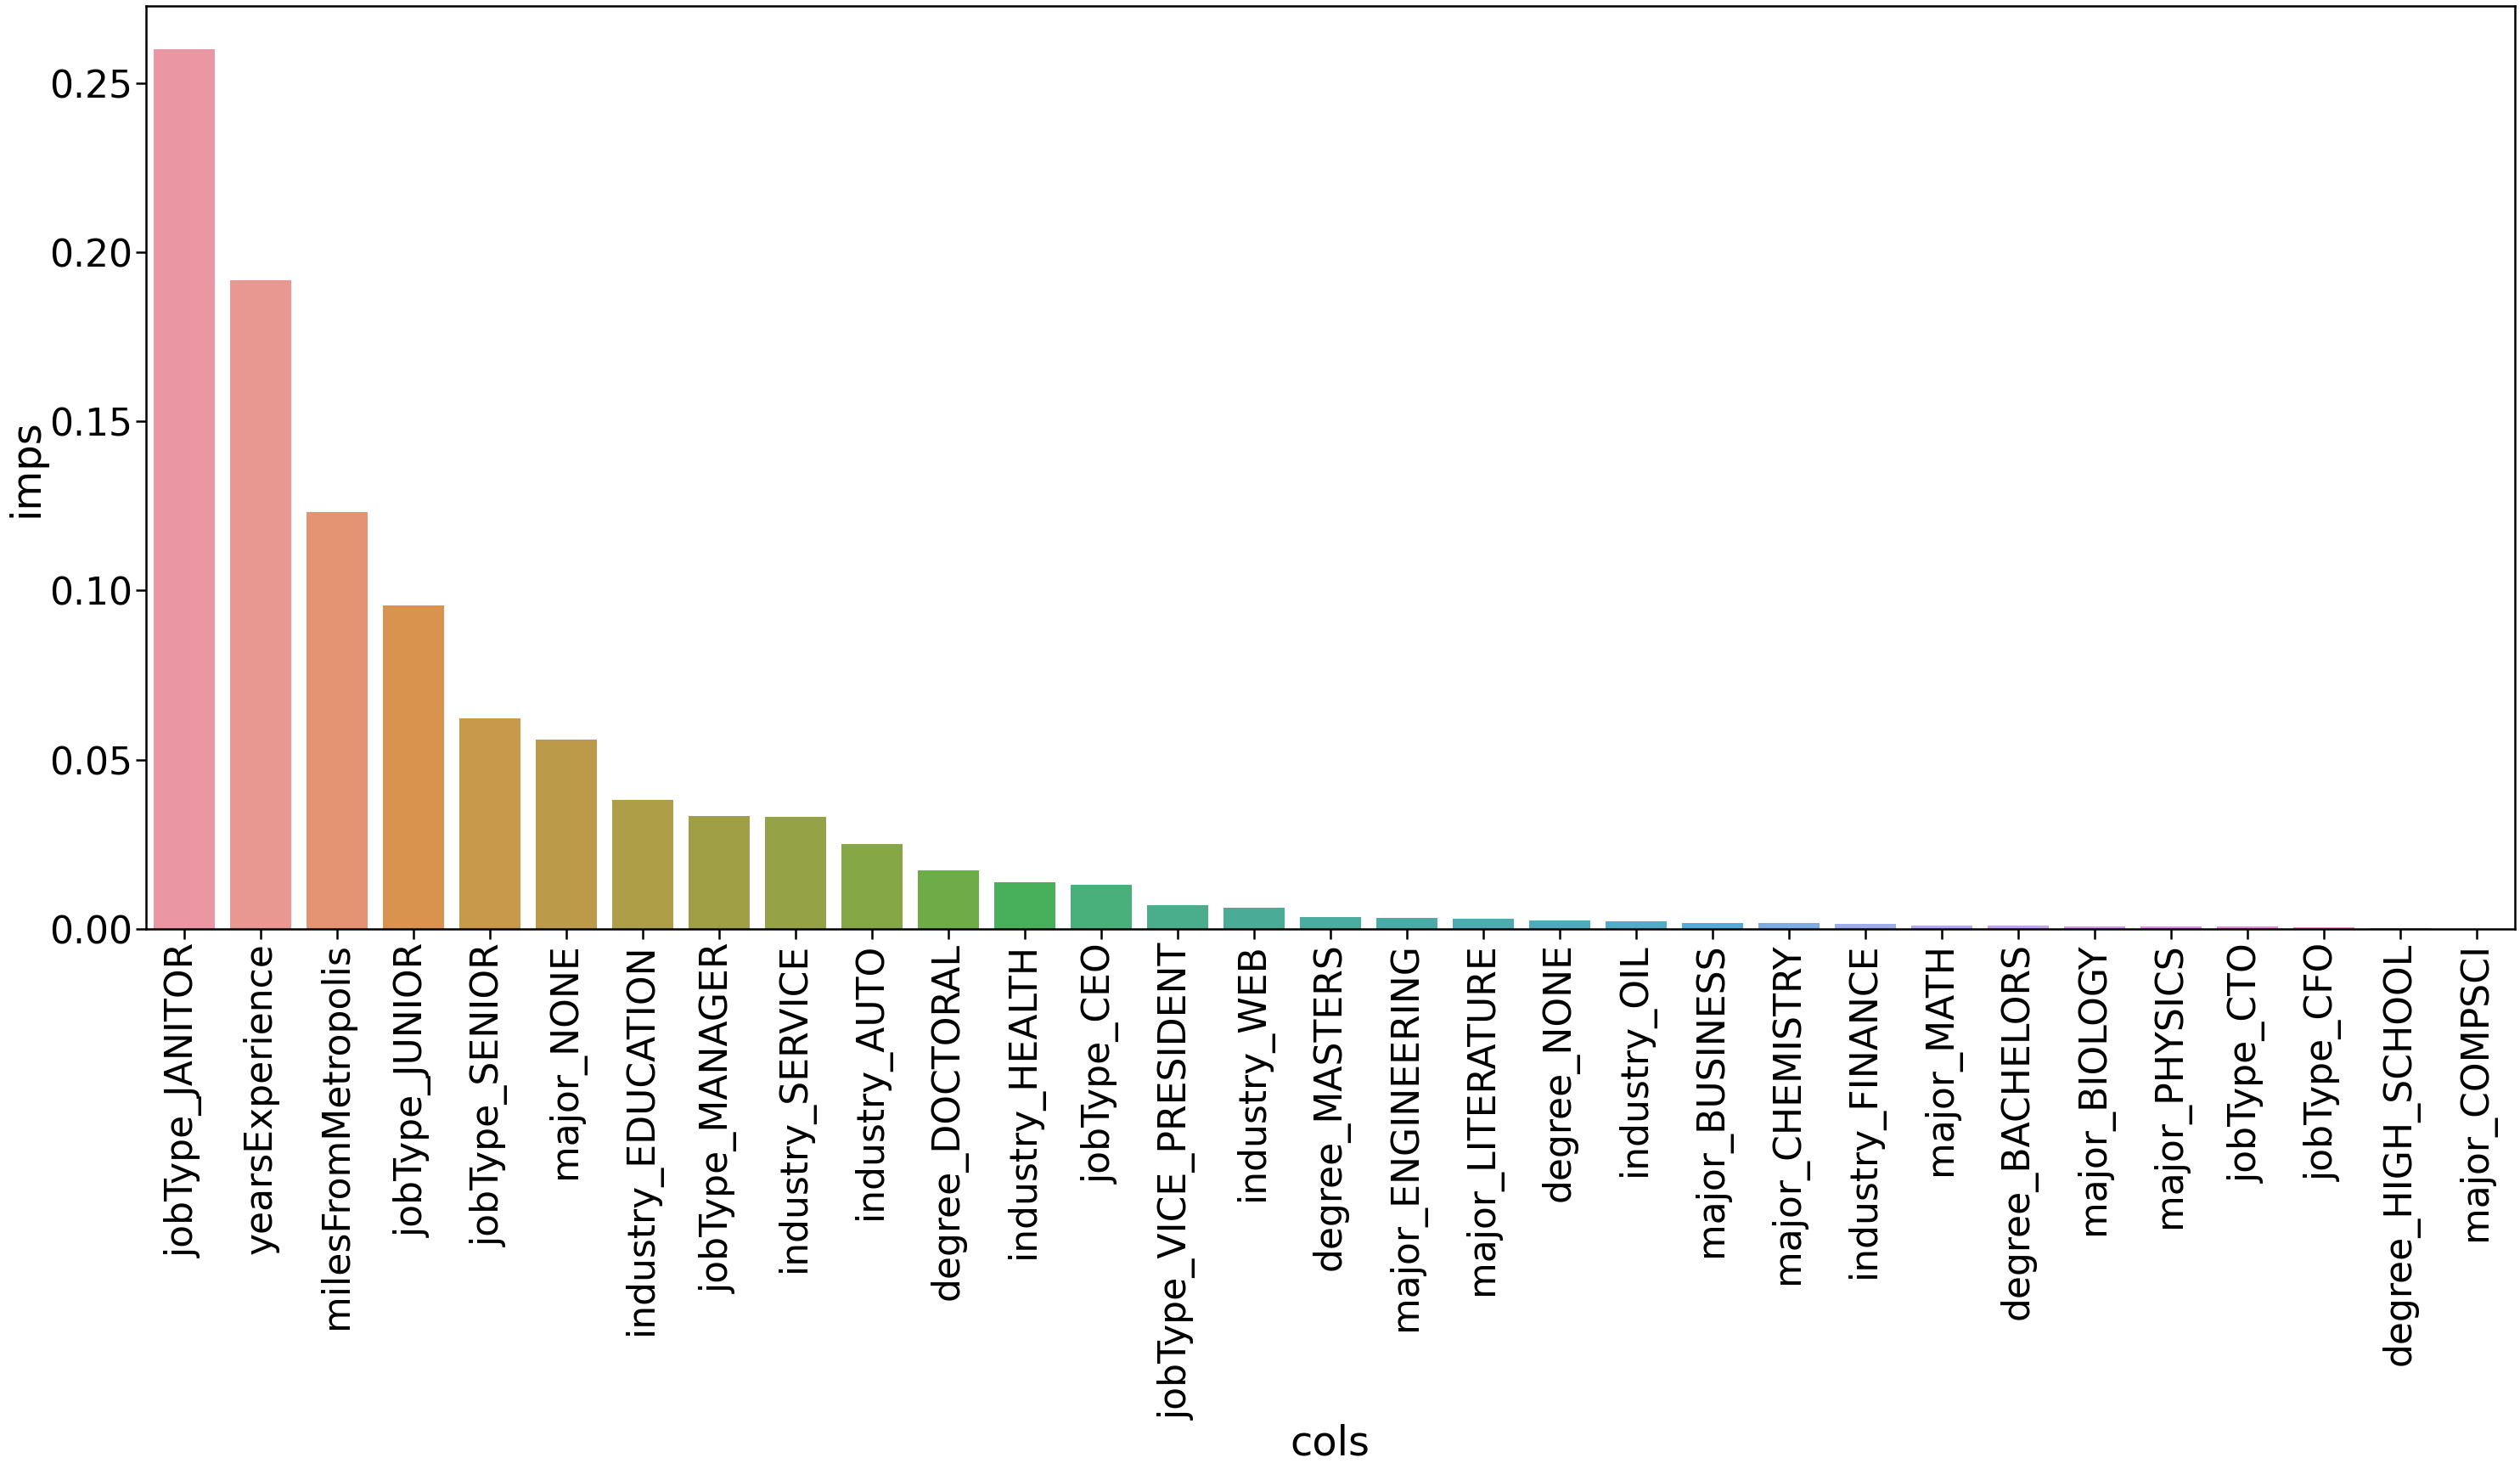

In [27]:
#visualizing feature importances
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
sns.barplot(x = 'cols', y = 'imps', data = feat_imp)
plt.xticks(rotation=90)
plt.show()

### ---- 11 Automate pipeline ----

In [ ]:
#importance = reg.feature_importances_
#importance
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data